In [1]:
import pandas as pd
import sqlite3

In [2]:
conn = sqlite3.connect('zippedData/im.db')

df = pd.read_sql("""

SELECT *
FROM movie_basics
JOIN movie_ratings
    USING(movie_id)
JOIN movie_akas
    USING(movie_id)


""", conn)

In [3]:
df.drop_duplicates(subset=['movie_id'], inplace=True)
df.drop(columns=['primary_title', 'original_title', 'ordering', 'region', 'types', 'attributes', 'is_original_title'], inplace=True)

In [4]:
df

,movie_id,start_year,runtime_minutes,genres,averagerating,numvotes,title,language
0,tt0063540,2013,175.0,"Action,Crime,Drama",7.0,77,Sangharsh,hi
5,tt0066787,2019,114.0,"Biography,Drama",7.2,43,One Day Before the Rainy Season,en
9,tt0069049,2018,122.0,Drama,6.9,4517,O Outro Lado do Vento,None
22,tt0069204,2018,NaN,"Comedy,Drama",6.1,13,Subse Bada Sukh,bn
25,tt0100275,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,La Telenovela Errante,None
...,...,...,...,...,...,...,...,...
261792,tt9899860,2019,100.0,"Drama,Thriller",8.1,7,Watching This Movie Is a Crime,en
261795,tt9899880,2018,85.0,Comedy,5.8,5,Columbus,None
261797,tt9903952,2018,87.0,"Comedy,Horror",9.2,5,BADMEN with a good behavior,None
261800,tt9905462,2019,111.0,Drama,8.4,600,Pengalila,None


In [5]:
df2 = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', compression='gzip')

In [6]:
df2

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [7]:
df2.rename(columns={'movie': 'title'}, inplace=True)

In [8]:
merged = df.merge(df2, on='title')

In [9]:
merged.columns

Index(['movie_id', 'start_year', 'runtime_minutes', 'genres', 'averagerating',
       'numvotes', 'title', 'language', 'id', 'release_date',
       'production_budget', 'domestic_gross', 'worldwide_gross'],
      dtype='object')

In [10]:
merged.genres = merged.genres.str.split(',')

In [11]:
merged.genres

0                          [Horror]
1          [Comedy, Drama, Romance]
2                           [Drama]
3                [Horror, Thriller]
4       [Action, Adventure, Sci-Fi]
                   ...             
1223     [Biography, Comedy, Drama]
1224                  [Documentary]
1225                  [Documentary]
1226                  [Documentary]
1227             [Biography, Drama]
Name: genres, Length: 1228, dtype: object

In [12]:
merged.drop(columns=['language'], inplace=True)

In [13]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1228 entries, 0 to 1227
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           1228 non-null   object 
 1   start_year         1228 non-null   int64  
 2   runtime_minutes    1127 non-null   float64
 3   genres             1225 non-null   object 
 4   averagerating      1228 non-null   float64
 5   numvotes           1228 non-null   int64  
 6   title              1228 non-null   object 
 7   id                 1228 non-null   int64  
 8   release_date       1228 non-null   object 
 9   production_budget  1228 non-null   object 
 10  domestic_gross     1228 non-null   object 
 11  worldwide_gross    1228 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 124.7+ KB


In [14]:
merged.dropna(subset=['genres'], inplace=True)

In [15]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1225 entries, 0 to 1227
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           1225 non-null   object 
 1   start_year         1225 non-null   int64  
 2   runtime_minutes    1127 non-null   float64
 3   genres             1225 non-null   object 
 4   averagerating      1225 non-null   float64
 5   numvotes           1225 non-null   int64  
 6   title              1225 non-null   object 
 7   id                 1225 non-null   int64  
 8   release_date       1225 non-null   object 
 9   production_budget  1225 non-null   object 
 10  domestic_gross     1225 non-null   object 
 11  worldwide_gross    1225 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 124.4+ KB


In [16]:
genre_columns = []

for i in merged.genres:
    for x in i:
        genre_columns.append(x)

genre_columns = list(set(genre_columns))

genre_columns

['News',
 'Animation',
 'Western',
 'Sci-Fi',
 'Action',
 'Documentary',
 'History',
 'Thriller',
 'Comedy',
 'Horror',
 'Sport',
 'Musical',
 'Romance',
 'Music',
 'Drama',
 'Adventure',
 'Fantasy',
 'Crime',
 'War',
 'Family',
 'Biography',
 'Mystery']

In [17]:
def binary_genres(lst, genre):
    
    if genre in lst:
        return 1
    else:
        return 0
    
merged['Comedy'] = merged.genres.apply(lambda x: binary_genres(x, 'Comedy'))

In [18]:
merged.Comedy

0       0
1       1
2       0
3       0
4       0
       ..
1223    1
1224    0
1225    0
1226    0
1227    0
Name: Comedy, Length: 1225, dtype: int64

In [19]:
genre_columns

['News',
 'Animation',
 'Western',
 'Sci-Fi',
 'Action',
 'Documentary',
 'History',
 'Thriller',
 'Comedy',
 'Horror',
 'Sport',
 'Musical',
 'Romance',
 'Music',
 'Drama',
 'Adventure',
 'Fantasy',
 'Crime',
 'War',
 'Family',
 'Biography',
 'Mystery']

In [20]:
merged['Horror'] = merged.genres.apply(lambda x: binary_genres(x, 'Horror'))
merged['History'] = merged.genres.apply(lambda x: binary_genres(x, 'History'))
merged['Action'] = merged.genres.apply(lambda x: binary_genres(x, 'Action'))
merged['Romance'] = merged.genres.apply(lambda x: binary_genres(x, 'Romance'))
merged['Sport'] = merged.genres.apply(lambda x: binary_genres(x, 'Sport'))
merged['Drama'] = merged.genres.apply(lambda x: binary_genres(x, 'Drama'))
merged['Western'] = merged.genres.apply(lambda x: binary_genres(x, 'Western'))
merged['Crime'] = merged.genres.apply(lambda x: binary_genres(x, 'Crime'))
merged['Thriller'] = merged.genres.apply(lambda x: binary_genres(x, 'Thriller'))
merged['News'] = merged.genres.apply(lambda x: binary_genres(x, 'News'))
merged['Animation'] = merged.genres.apply(lambda x: binary_genres(x, 'Animation'))
merged['Mystery'] = merged.genres.apply(lambda x: binary_genres(x, 'Mystery'))
merged['Biography'] = merged.genres.apply(lambda x: binary_genres(x, 'Biography'))
merged['Music'] = merged.genres.apply(lambda x: binary_genres(x, 'Music'))
merged['Sci-Fi'] = merged.genres.apply(lambda x: binary_genres(x, 'Sci-Fi'))
merged['War'] = merged.genres.apply(lambda x: binary_genres(x, 'War'))
merged['Fantasy'] = merged.genres.apply(lambda x: binary_genres(x, 'Fantasy'))
merged['Family'] = merged.genres.apply(lambda x: binary_genres(x, 'Family'))
merged['Musical'] = merged.genres.apply(lambda x: binary_genres(x, 'Musical'))
merged['Adventure'] = merged.genres.apply(lambda x: binary_genres(x, 'Adventure'))
merged['Documentary'] = merged.genres.apply(lambda x: binary_genres(x, 'Documentary'))

In [21]:
merged

,movie_id,start_year,runtime_minutes,genres,averagerating,numvotes,title,id,release_date,production_budget,...,Mystery,Biography,Music,Sci-Fi,War,Fantasy,Family,Musical,Adventure,Documentary
0,tt0339736,2017,98.0,[Horror],5.6,2420,Whiplash,43,"Oct 10, 2014","$3,300,000",...,0,0,0,0,0,0,0,0,0,0
1,tt0393049,2010,98.0,"[Comedy, Drama, Romance]",5.5,106,Anderson's Cross,65,"Dec 31, 2010","$300,000",...,0,0,0,0,0,0,0,0,0,0
2,tt0426566,2012,NaN,[Drama],6.0,13,Breakdown,11,"May 2, 1997","$36,000,000",...,0,0,0,0,0,0,0,0,0,0
3,tt0436230,2010,NaN,"[Horror, Thriller]",6.7,34,The Devil Inside,12,"Jan 6, 2012","$1,000,000",...,0,0,0,0,0,0,0,0,0,0
4,tt0437086,2019,122.0,"[Action, Adventure, Sci-Fi]",7.5,88207,Alita: Battle Angel,24,"Feb 14, 2019","$170,000,000",...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1223,tt8266310,2019,117.0,"[Biography, Comedy, Drama]",6.2,173,Blinded by the Light,64,"Aug 14, 2019","$15,000,000",...,0,1,0,0,0,0,0,0,0,0
1224,tt8450662,2018,66.0,[Documentary],7.3,22,Beloved,65,"Oct 16, 1998","$53,000,000",...,0,0,0,0,0,0,0,0,0,1
1225,tt8632862,2018,128.0,[Documentary],6.7,11628,Fahrenheit 11/9,29,"Sep 21, 2018","$5,000,000",...,0,0,0,0,0,0,0,0,0,1
1226,tt8816388,2018,28.0,[Documentary],5.7,7,Demonic,56,"Oct 10, 2017","$3,000,000",...,0,0,0,0,0,0,0,0,0,1


In [22]:
merged.production_budget = merged['production_budget'].str.strip('$')
merged.production_budget = merged['production_budget'].str.replace(',', '')
merged.production_budget = merged.production_budget.astype('float')

In [23]:
merged.worldwide_gross = merged['worldwide_gross'].str.strip('$')
merged.worldwide_gross = merged['worldwide_gross'].str.replace(',', '')
merged.worldwide_gross = merged.worldwide_gross.astype('float')

In [24]:
merged.domestic_gross = merged['domestic_gross'].str.strip('$')
merged.domestic_gross = merged['domestic_gross'].str.replace(',', '')
merged.domestic_gross = merged.domestic_gross.astype('float')

In [25]:
merged['budget_percentage_contribution'] = merged.production_budget / (merged.production_budget + merged.worldwide_gross)
merged['worldwide_gross_percentage_contribution'] = merged.worldwide_gross / (merged.production_budget + merged.worldwide_gross)
merged['domestic_gross_percentage_contribution'] = merged.domestic_gross / (merged.production_budget + merged.domestic_gross)

In [26]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1225 entries, 0 to 1227
Data columns (total 37 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   movie_id                                 1225 non-null   object 
 1   start_year                               1225 non-null   int64  
 2   runtime_minutes                          1127 non-null   float64
 3   genres                                   1225 non-null   object 
 4   averagerating                            1225 non-null   float64
 5   numvotes                                 1225 non-null   int64  
 6   title                                    1225 non-null   object 
 7   id                                       1225 non-null   int64  
 8   release_date                             1225 non-null   object 
 9   production_budget                        1225 non-null   float64
 10  domestic_gross                           1225 no

In [27]:
merged.head()

,movie_id,start_year,runtime_minutes,genres,averagerating,numvotes,title,id,release_date,production_budget,...,Sci-Fi,War,Fantasy,Family,Musical,Adventure,Documentary,budget_percentage_contribution,worldwide_gross_percentage_contribution,domestic_gross_percentage_contribution
0,tt0339736,2017,98.0,[Horror],5.6,2420,Whiplash,43,"Oct 10, 2014",3300000.0,...,0,0,0,0,0,0,0,0.078071,0.921929,0.798682
1,tt0393049,2010,98.0,"[Comedy, Drama, Romance]",5.5,106,Anderson's Cross,65,"Dec 31, 2010",300000.0,...,0,0,0,0,0,0,0,1.000000,0.000000,0.000000
2,tt0426566,2012,NaN,[Drama],6.0,13,Breakdown,11,"May 2, 1997",36000000.0,...,0,0,0,0,0,0,0,0.417831,0.582169,0.582169
3,tt0436230,2010,NaN,"[Horror, Thriller]",6.7,34,The Devil Inside,12,"Jan 6, 2012",1000000.0,...,0,0,0,0,0,0,0,0.009731,0.990269,0.981571
4,tt0437086,2019,122.0,"[Action, Adventure, Sci-Fi]",7.5,88207,Alita: Battle Angel,24,"Feb 14, 2019",170000000.0,...,1,0,0,0,0,1,0,0.296697,0.703303,0.335185


<AxesSubplot:ylabel='Fantasy'>

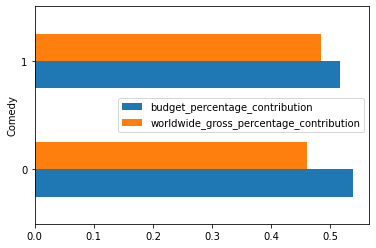

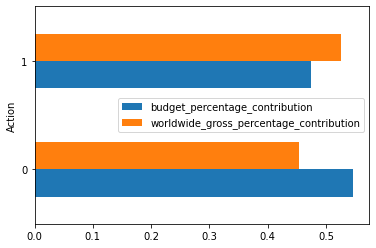

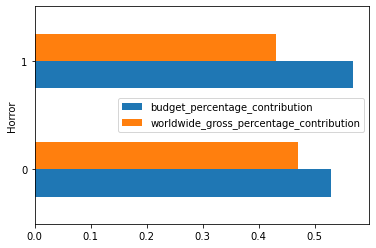

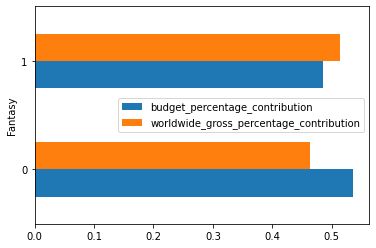

In [28]:
merged.groupby(['Comedy'])[['budget_percentage_contribution', 'worldwide_gross_percentage_contribution']].mean().plot(kind='barh')
merged.groupby(['Action'])[['budget_percentage_contribution', 'worldwide_gross_percentage_contribution']].mean().plot(kind='barh')
merged.groupby(['Horror'])[['budget_percentage_contribution', 'worldwide_gross_percentage_contribution']].mean().plot(kind='barh')
merged.groupby(['Fantasy'])[['budget_percentage_contribution', 'worldwide_gross_percentage_contribution']].mean().plot(kind='barh')

In [29]:
merged[merged.production_budget > merged.worldwide_gross]

,movie_id,start_year,runtime_minutes,genres,averagerating,numvotes,title,id,release_date,production_budget,...,Sci-Fi,War,Fantasy,Family,Musical,Adventure,Documentary,budget_percentage_contribution,worldwide_gross_percentage_contribution,domestic_gross_percentage_contribution
1,tt0393049,2010,98.0,"[Comedy, Drama, Romance]",5.5,106,Anderson's Cross,65,"Dec 31, 2010",300000.0,...,0,0,0,0,0,0,0,1.000000,0.000000,0.000000
8,tt0464054,2014,91.0,"[Horror, Thriller]",6.5,331,House at the End of the Drive,28,"Dec 31, 2014",1400000.0,...,0,0,0,0,0,0,0,1.000000,0.000000,0.000000
15,tt0491203,2017,105.0,"[Drama, History, Romance]",6.2,15037,Tulip Fever,8,"Sep 1, 2017",25000000.0,...,0,0,0,0,0,0,0,0.786342,0.213658,0.089440
17,tt0775489,2010,80.0,"[Animation, Drama]",7.5,31734,L'illusionniste,7,"Dec 25, 2010",17000000.0,...,0,0,0,0,0,0,0,0.663805,0.336195,0.116032
20,tt0816462,2011,113.0,"[Action, Adventure, Fantasy]",5.2,90834,Conan the Barbarian,76,"Aug 19, 2011",90000000.0,...,0,0,1,0,0,1,0,0.586869,0.413131,0.191338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1217,tt7799386,2018,110.0,[Drama],7.0,234,Conviction,28,"Oct 15, 2010",12500000.0,...,0,0,0,0,0,0,0,0.513833,0.486167,0.352254
1218,tt7837402,2019,77.0,"[Horror, Sci-Fi, Thriller]",5.6,43,Red 11,78,"Dec 31, 2018",7000.0,...,1,0,0,0,0,0,0,1.000000,0.000000,0.000000
1222,tt8043306,2018,155.0,"[Action, Comedy, Crime]",7.4,2724,Teefa in Trouble,8,"Jul 20, 2018",1500000.0,...,0,0,0,0,0,0,0,0.938200,0.061800,0.000000
1223,tt8266310,2019,117.0,"[Biography, Comedy, Drama]",6.2,173,Blinded by the Light,64,"Aug 14, 2019",15000000.0,...,0,0,0,0,0,0,0,1.000000,0.000000,0.000000


In [30]:
merged[merged.production_budget < merged.worldwide_gross]

,movie_id,start_year,runtime_minutes,genres,averagerating,numvotes,title,id,release_date,production_budget,...,Sci-Fi,War,Fantasy,Family,Musical,Adventure,Documentary,budget_percentage_contribution,worldwide_gross_percentage_contribution,domestic_gross_percentage_contribution
0,tt0339736,2017,98.0,[Horror],5.6,2420,Whiplash,43,"Oct 10, 2014",3300000.0,...,0,0,0,0,0,0,0,0.078071,0.921929,0.798682
2,tt0426566,2012,NaN,[Drama],6.0,13,Breakdown,11,"May 2, 1997",36000000.0,...,0,0,0,0,0,0,0,0.417831,0.582169,0.582169
3,tt0436230,2010,NaN,"[Horror, Thriller]",6.7,34,The Devil Inside,12,"Jan 6, 2012",1000000.0,...,0,0,0,0,0,0,0,0.009731,0.990269,0.981571
4,tt0437086,2019,122.0,"[Action, Adventure, Sci-Fi]",7.5,88207,Alita: Battle Angel,24,"Feb 14, 2019",170000000.0,...,1,0,0,0,0,1,0,0.296697,0.703303,0.335185
5,tt0443272,2012,150.0,"[Biography, Drama, History]",7.4,228701,Lincoln,73,"Nov 9, 2012",65000000.0,...,0,0,0,0,0,0,0,0.192111,0.807889,0.737063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220,tt7961060,2018,100.0,"[Action, Adventure, Animation]",8.0,16465,Dragon Ball Super: Broly,36,"Jan 16, 2019",8500000.0,...,0,0,0,0,0,1,0,0.064763,0.935237,0.781360
1221,tt7981492,2018,113.0,"[Horror, Thriller]",4.3,971,Sabrina,60,"Dec 15, 1995",58000000.0,...,0,0,0,0,0,0,0,0.399724,0.600276,0.479626
1225,tt8632862,2018,128.0,[Documentary],6.7,11628,Fahrenheit 11/9,29,"Sep 21, 2018",5000000.0,...,0,0,0,0,0,0,1,0.429048,0.570952,0.559561
1226,tt8816388,2018,28.0,[Documentary],5.7,7,Demonic,56,"Oct 10, 2017",3000000.0,...,0,0,0,0,0,0,1,0.391231,0.608769,0.000000


In [31]:
world_gross_df = merged[merged.worldwide_gross != 0]

In [32]:
genre_columns

['News',
 'Animation',
 'Western',
 'Sci-Fi',
 'Action',
 'Documentary',
 'History',
 'Thriller',
 'Comedy',
 'Horror',
 'Sport',
 'Musical',
 'Romance',
 'Music',
 'Drama',
 'Adventure',
 'Fantasy',
 'Crime',
 'War',
 'Family',
 'Biography',
 'Mystery']

C:\Users\mikey\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


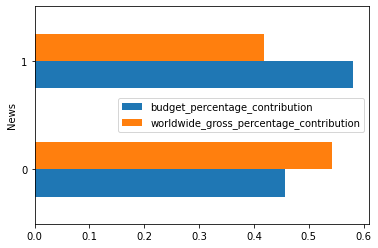

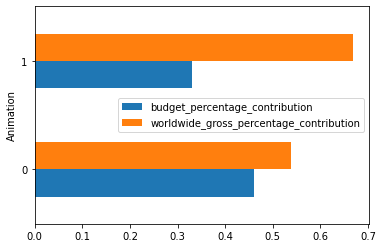

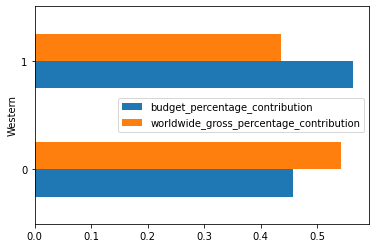

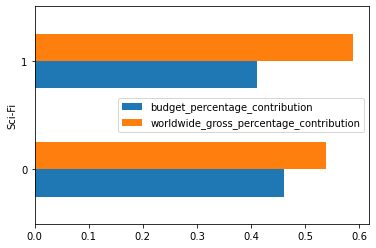

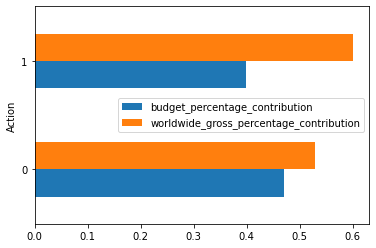

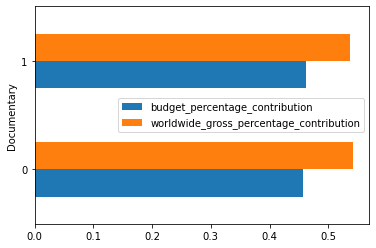

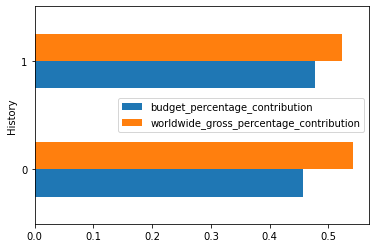

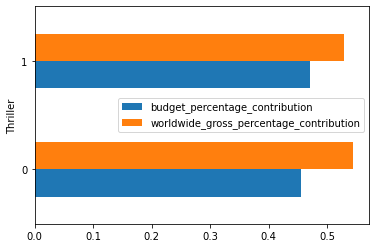

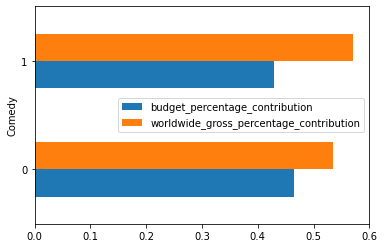

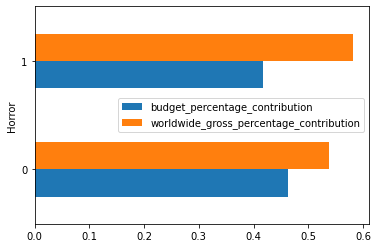

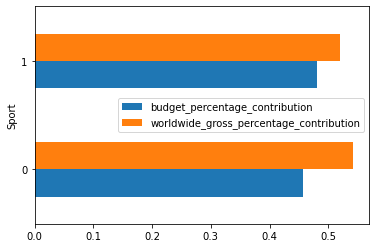

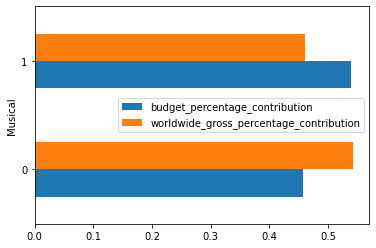

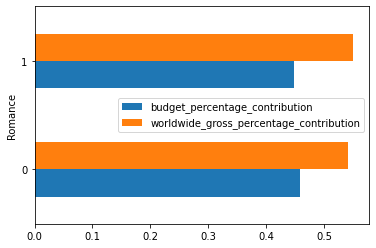

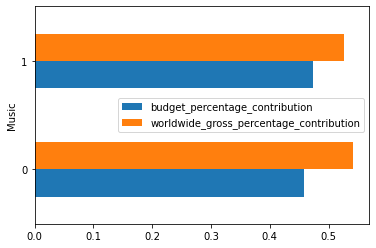

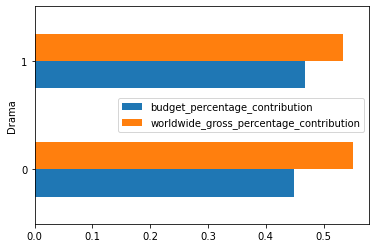

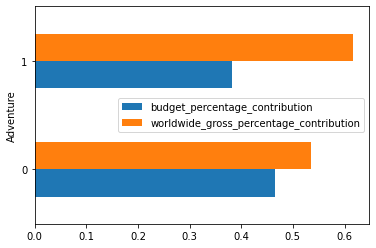

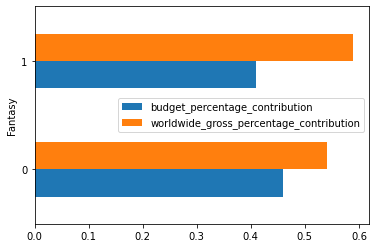

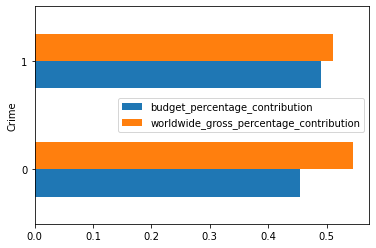

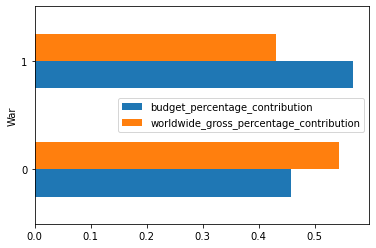

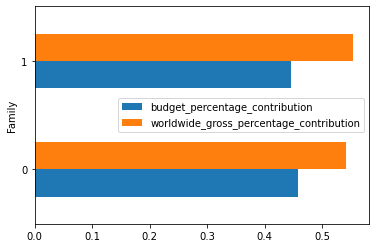

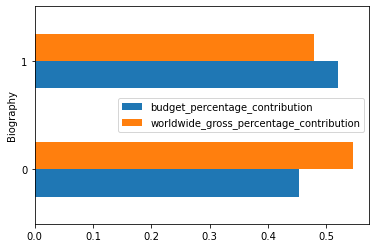

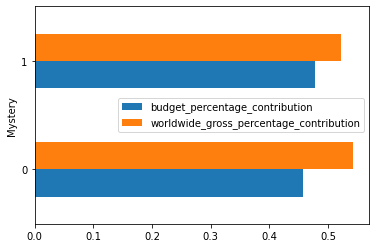

In [33]:
for i in genre_columns:
    world_gross_df.groupby([i])[['budget_percentage_contribution', 'worldwide_gross_percentage_contribution']].mean().plot(kind='barh')

In [34]:
merged['production_budget_contribution_domestic'] = merged.production_budget / (merged.production_budget + merged.domestic_gross)

In [35]:
merged.head()

,movie_id,start_year,runtime_minutes,genres,averagerating,numvotes,title,id,release_date,production_budget,...,War,Fantasy,Family,Musical,Adventure,Documentary,budget_percentage_contribution,worldwide_gross_percentage_contribution,domestic_gross_percentage_contribution,production_budget_contribution_domestic
0,tt0339736,2017,98.0,[Horror],5.6,2420,Whiplash,43,"Oct 10, 2014",3300000.0,...,0,0,0,0,0,0,0.078071,0.921929,0.798682,0.201318
1,tt0393049,2010,98.0,"[Comedy, Drama, Romance]",5.5,106,Anderson's Cross,65,"Dec 31, 2010",300000.0,...,0,0,0,0,0,0,1.000000,0.000000,0.000000,1.000000
2,tt0426566,2012,NaN,[Drama],6.0,13,Breakdown,11,"May 2, 1997",36000000.0,...,0,0,0,0,0,0,0.417831,0.582169,0.582169,0.417831
3,tt0436230,2010,NaN,"[Horror, Thriller]",6.7,34,The Devil Inside,12,"Jan 6, 2012",1000000.0,...,0,0,0,0,0,0,0.009731,0.990269,0.981571,0.018429
4,tt0437086,2019,122.0,"[Action, Adventure, Sci-Fi]",7.5,88207,Alita: Battle Angel,24,"Feb 14, 2019",170000000.0,...,0,0,0,0,1,0,0.296697,0.703303,0.335185,0.664815


In [36]:
domestic_gross_df = merged[merged.domestic_gross != 0]

C:\Users\mikey\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


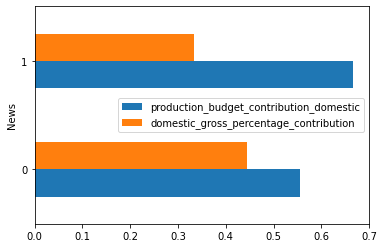

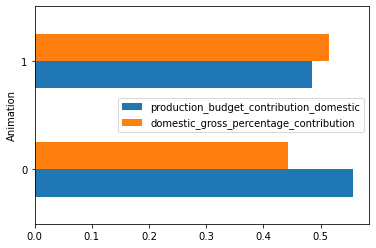

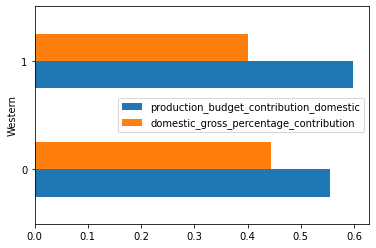

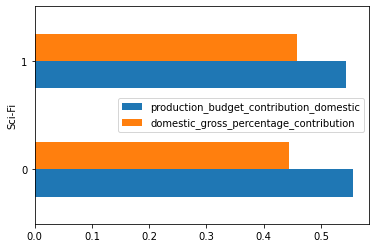

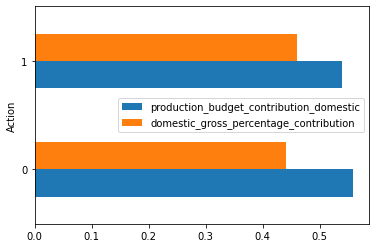

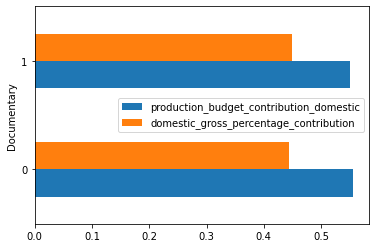

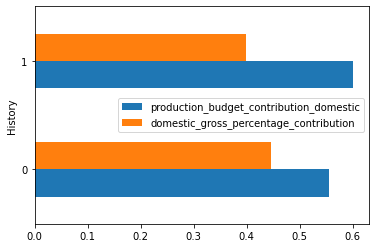

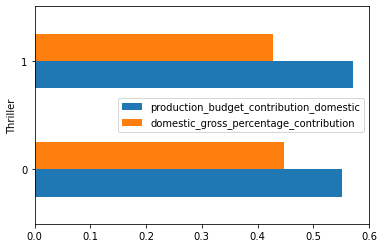

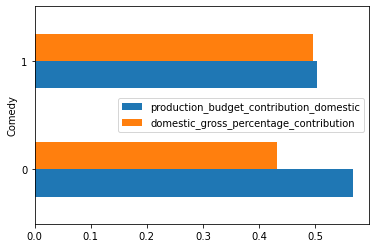

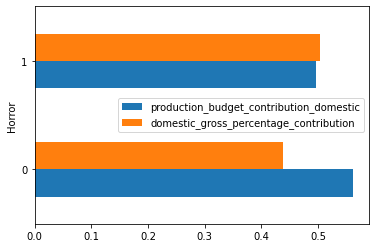

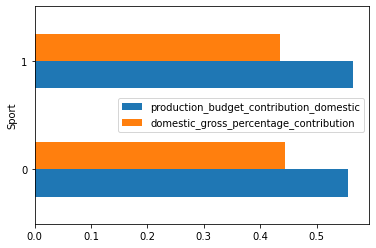

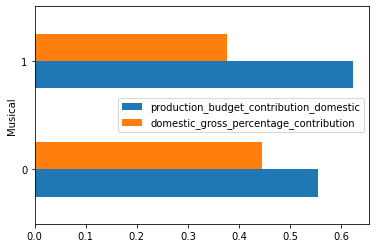

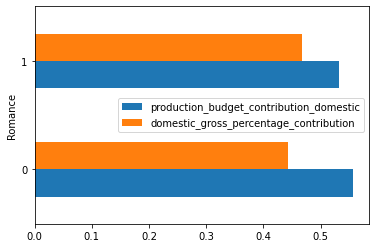

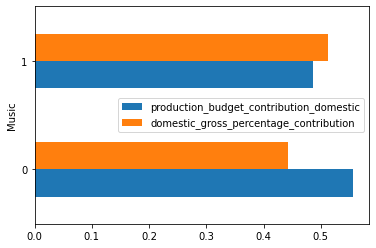

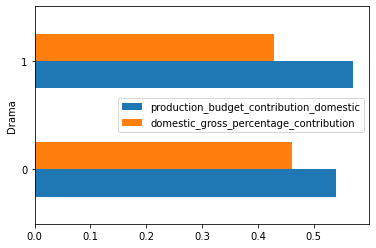

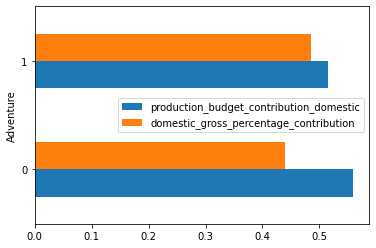

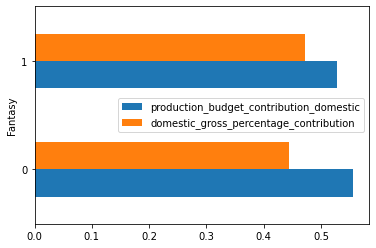

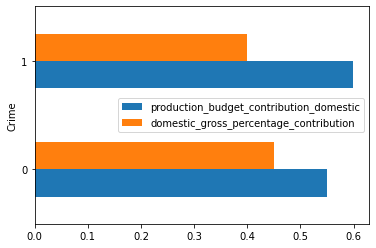

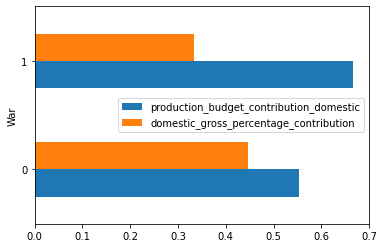

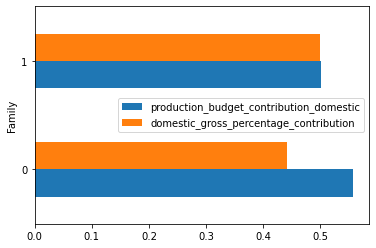

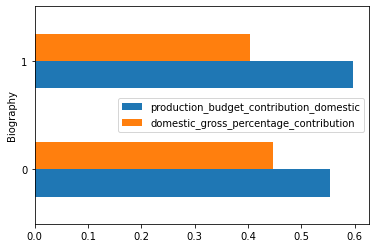

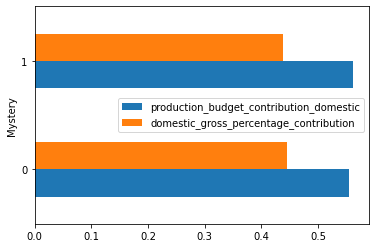

In [37]:
for i in genre_columns:
    domestic_gross_df.groupby([i])[['production_budget_contribution_domestic', 'domestic_gross_percentage_contribution']].mean().plot(kind='barh')

In [38]:
merged

,movie_id,start_year,runtime_minutes,genres,averagerating,numvotes,title,id,release_date,production_budget,...,War,Fantasy,Family,Musical,Adventure,Documentary,budget_percentage_contribution,worldwide_gross_percentage_contribution,domestic_gross_percentage_contribution,production_budget_contribution_domestic
0,tt0339736,2017,98.0,[Horror],5.6,2420,Whiplash,43,"Oct 10, 2014",3300000.0,...,0,0,0,0,0,0,0.078071,0.921929,0.798682,0.201318
1,tt0393049,2010,98.0,"[Comedy, Drama, Romance]",5.5,106,Anderson's Cross,65,"Dec 31, 2010",300000.0,...,0,0,0,0,0,0,1.000000,0.000000,0.000000,1.000000
2,tt0426566,2012,NaN,[Drama],6.0,13,Breakdown,11,"May 2, 1997",36000000.0,...,0,0,0,0,0,0,0.417831,0.582169,0.582169,0.417831
3,tt0436230,2010,NaN,"[Horror, Thriller]",6.7,34,The Devil Inside,12,"Jan 6, 2012",1000000.0,...,0,0,0,0,0,0,0.009731,0.990269,0.981571,0.018429
4,tt0437086,2019,122.0,"[Action, Adventure, Sci-Fi]",7.5,88207,Alita: Battle Angel,24,"Feb 14, 2019",170000000.0,...,0,0,0,0,1,0,0.296697,0.703303,0.335185,0.664815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1223,tt8266310,2019,117.0,"[Biography, Comedy, Drama]",6.2,173,Blinded by the Light,64,"Aug 14, 2019",15000000.0,...,0,0,0,0,0,0,1.000000,0.000000,0.000000,1.000000
1224,tt8450662,2018,66.0,[Documentary],7.3,22,Beloved,65,"Oct 16, 1998",53000000.0,...,0,0,0,0,0,1,0.698725,0.301275,0.301275,0.698725
1225,tt8632862,2018,128.0,[Documentary],6.7,11628,Fahrenheit 11/9,29,"Sep 21, 2018",5000000.0,...,0,0,0,0,0,1,0.429048,0.570952,0.559561,0.440439
1226,tt8816388,2018,28.0,[Documentary],5.7,7,Demonic,56,"Oct 10, 2017",3000000.0,...,0,0,0,0,0,1,0.391231,0.608769,0.000000,1.000000


In [39]:
good_movies = merged[(merged.averagerating > 7) & (merged.worldwide_gross != 0) & (merged.domestic_gross != 0)]

C:\Users\mikey\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


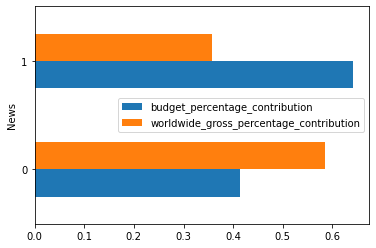

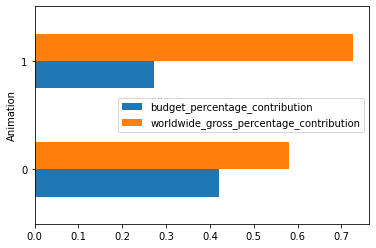

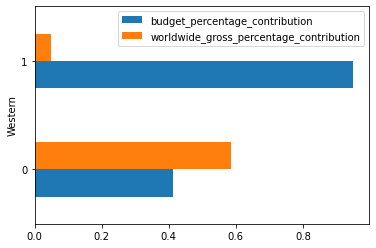

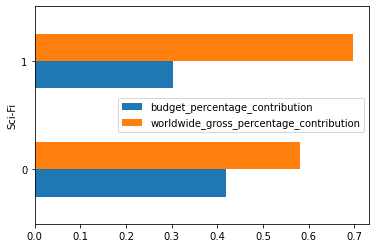

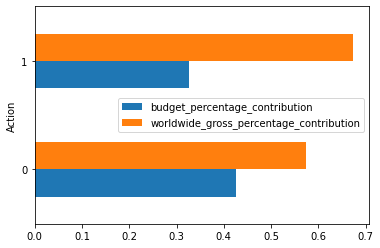

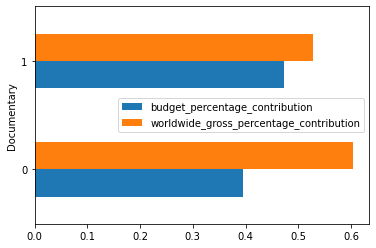

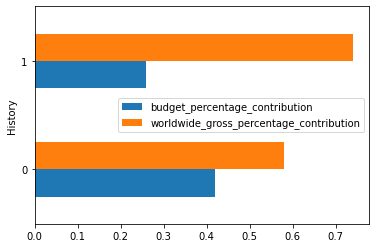

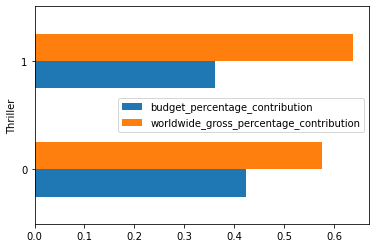

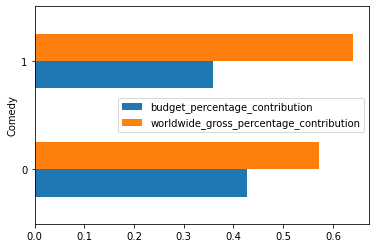

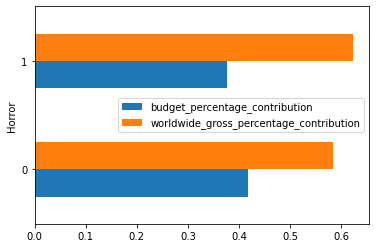

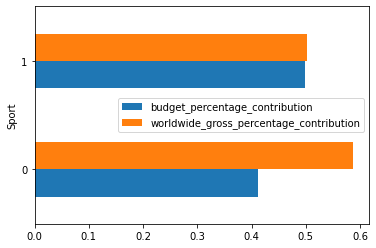

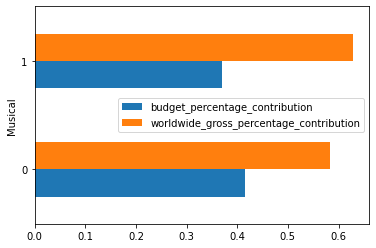

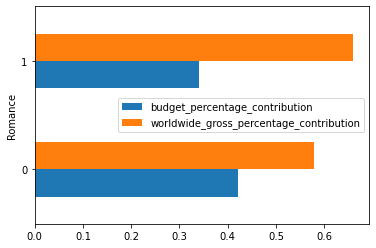

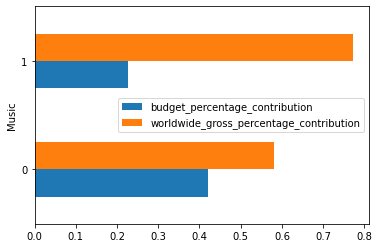

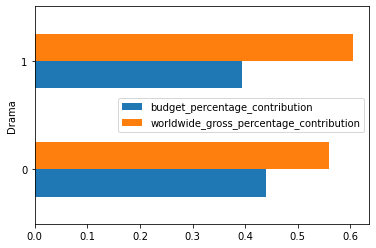

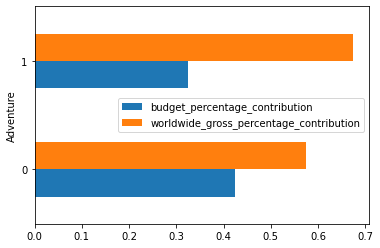

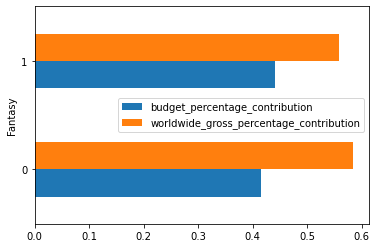

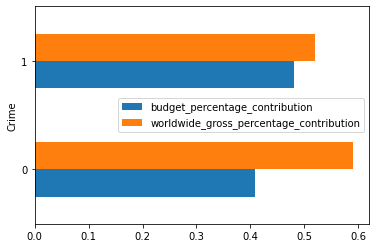

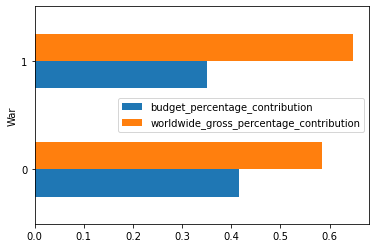

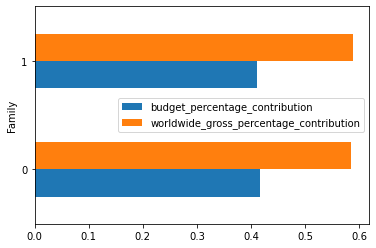

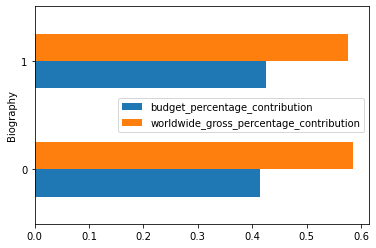

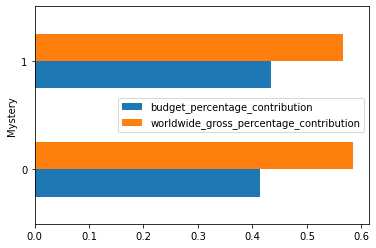

In [40]:
for i in genre_columns:
    good_movies.groupby([i])[['budget_percentage_contribution', 'worldwide_gross_percentage_contribution']].mean().plot(kind='barh')

In [41]:
merged.groupby(['Comedy'])[['averagerating', 'worldwide_gross_percentage_contribution', 'budget_percentage_contribution']].mean()

,averagerating,worldwide_gross_percentage_contribution,budget_percentage_contribution
Comedy,,,
0,6.163313,0.461022,0.538978
1,6.167635,0.483795,0.516205


In [42]:
merged.groupby(['Action'])[['averagerating', 'worldwide_gross_percentage_contribution', 'budget_percentage_contribution']].mean()

,averagerating,worldwide_gross_percentage_contribution,budget_percentage_contribution
Action,,,
0,6.227953,0.452966,0.547034
1,5.854067,0.526446,0.473554


In [43]:
studio_movies = merged[(merged.numvotes > 1000) & (merged.worldwide_gross != 0) & (merged.domestic_gross != 0)]

In [44]:
studio_movies

,movie_id,start_year,runtime_minutes,genres,averagerating,numvotes,title,id,release_date,production_budget,...,War,Fantasy,Family,Musical,Adventure,Documentary,budget_percentage_contribution,worldwide_gross_percentage_contribution,domestic_gross_percentage_contribution,production_budget_contribution_domestic
0,tt0339736,2017,98.0,[Horror],5.6,2420,Whiplash,43,"Oct 10, 2014",3300000.0,...,0,0,0,0,0,0,0.078071,0.921929,0.798682,0.201318
4,tt0437086,2019,122.0,"[Action, Adventure, Sci-Fi]",7.5,88207,Alita: Battle Angel,24,"Feb 14, 2019",170000000.0,...,0,0,0,0,1,0,0.296697,0.703303,0.335185,0.664815
5,tt0443272,2012,150.0,"[Biography, Drama, History]",7.4,228701,Lincoln,73,"Nov 9, 2012",65000000.0,...,0,0,0,0,0,0,0.192111,0.807889,0.737063,0.262937
6,tt0448115,2019,132.0,"[Action, Adventure, Comedy]",7.4,109051,Shazam!,97,"Apr 5, 2019",85000000.0,...,0,0,0,0,1,0,0.189775,0.810225,0.621561,0.378439
7,tt0455944,2014,132.0,"[Action, Crime, Thriller]",7.2,302302,The Equalizer,96,"Sep 26, 2014",55000000.0,...,0,0,0,0,0,0,0.221860,0.778140,0.648631,0.351369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215,tt7634968,2019,117.0,"[Comedy, Fantasy, Romance]",4.9,10141,What Men Want,21,"Feb 8, 2019",20000000.0,...,0,1,0,0,0,0,0.222440,0.777560,0.731946,0.268054
1216,tt7690670,2018,116.0,"[Action, Crime, Thriller]",5.0,4753,Superfly,49,"Jun 13, 2018",16000000.0,...,0,0,0,0,0,0,0.435687,0.564313,0.562089,0.437911
1220,tt7961060,2018,100.0,"[Action, Adventure, Animation]",8.0,16465,Dragon Ball Super: Broly,36,"Jan 16, 2019",8500000.0,...,0,0,0,0,1,0,0.064763,0.935237,0.781360,0.218640
1225,tt8632862,2018,128.0,[Documentary],6.7,11628,Fahrenheit 11/9,29,"Sep 21, 2018",5000000.0,...,0,0,0,0,0,1,0.429048,0.570952,0.559561,0.440439


In [45]:
studio_movies.groupby(['Action'])[['averagerating', 'worldwide_gross_percentage_contribution', 'budget_percentage_contribution']].mean()

,averagerating,worldwide_gross_percentage_contribution,budget_percentage_contribution
Action,,,
0,6.407347,0.594306,0.405694
1,6.265138,0.669962,0.330038


In [46]:
studio_movies.groupby(['Comedy'])[['averagerating', 'worldwide_gross_percentage_contribution', 'budget_percentage_contribution']].mean()

,averagerating,worldwide_gross_percentage_contribution,budget_percentage_contribution
Comedy,,,
0,6.403614,0.602018,0.397982
1,6.268571,0.654555,0.345445


In [47]:
studio_movies.groupby(['Fantasy'])[['averagerating', 'worldwide_gross_percentage_contribution', 'budget_percentage_contribution']].mean()

,averagerating,worldwide_gross_percentage_contribution,budget_percentage_contribution
Fantasy,,,
0,6.387613,0.615346,0.384654
1,6.017391,0.650052,0.349948


<AxesSubplot:ylabel='Frequency'>

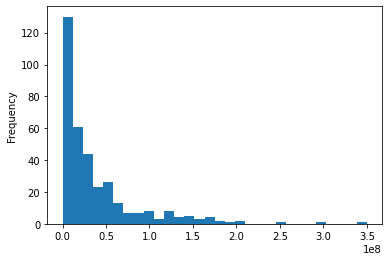

In [48]:
studio_movies.production_budget.plot(kind='hist', bins=30)

In [49]:
genre_amt = []
for i in genre_columns:
    print('The amount of movies that are {} is {}'.format(i, merged[i].sum()))
    genre_amt.append(merged[i].sum())
    
genre_amt

The amount of movies that are News is 5
The amount of movies that are Animation is 28
The amount of movies that are Western is 7
The amount of movies that are Sci-Fi is 82
The amount of movies that are Action is 209
The amount of movies that are Documentary is 159
The amount of movies that are History is 27
The amount of movies that are Thriller is 216
The amount of movies that are Comedy is 241
The amount of movies that are Horror is 158
The amount of movies that are Sport is 29
The amount of movies that are Musical is 15
The amount of movies that are Romance is 95
The amount of movies that are Music is 25
The amount of movies that are Drama is 606
The amount of movies that are Adventure is 106
The amount of movies that are Fantasy is 47
The amount of movies that are Crime is 131
The amount of movies that are War is 11
The amount of movies that are Family is 55
The amount of movies that are Biography is 75
The amount of movies that are Mystery is 79


[5,
 28,
 7,
 82,
 209,
 159,
 27,
 216,
 241,
 158,
 29,
 15,
 95,
 25,
 606,
 106,
 47,
 131,
 11,
 55,
 75,
 79]

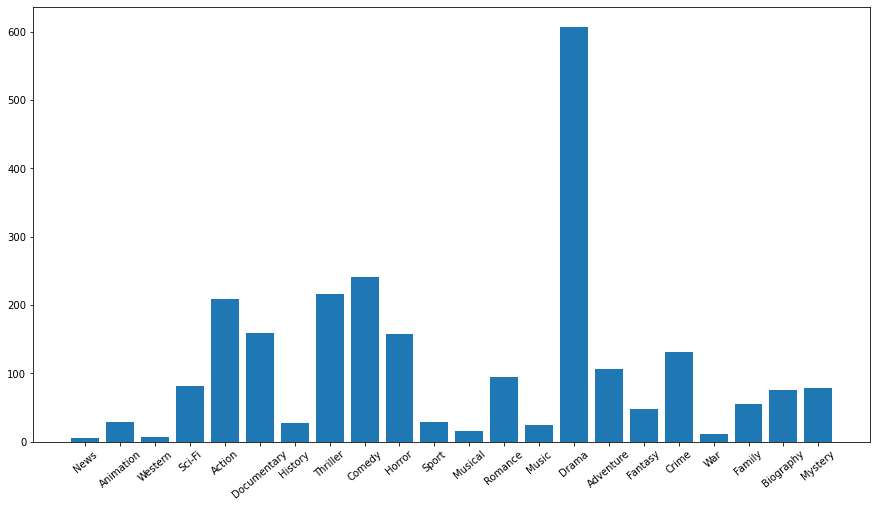

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(15,8))

ax.bar(range(len(genre_amt)), genre_amt)
ax.set_xticks(range(len(genre_amt)))
ax.set_xticklabels(genre_columns, rotation=40)


plt.show()

In [51]:
merged

,movie_id,start_year,runtime_minutes,genres,averagerating,numvotes,title,id,release_date,production_budget,...,War,Fantasy,Family,Musical,Adventure,Documentary,budget_percentage_contribution,worldwide_gross_percentage_contribution,domestic_gross_percentage_contribution,production_budget_contribution_domestic
0,tt0339736,2017,98.0,[Horror],5.6,2420,Whiplash,43,"Oct 10, 2014",3300000.0,...,0,0,0,0,0,0,0.078071,0.921929,0.798682,0.201318
1,tt0393049,2010,98.0,"[Comedy, Drama, Romance]",5.5,106,Anderson's Cross,65,"Dec 31, 2010",300000.0,...,0,0,0,0,0,0,1.000000,0.000000,0.000000,1.000000
2,tt0426566,2012,NaN,[Drama],6.0,13,Breakdown,11,"May 2, 1997",36000000.0,...,0,0,0,0,0,0,0.417831,0.582169,0.582169,0.417831
3,tt0436230,2010,NaN,"[Horror, Thriller]",6.7,34,The Devil Inside,12,"Jan 6, 2012",1000000.0,...,0,0,0,0,0,0,0.009731,0.990269,0.981571,0.018429
4,tt0437086,2019,122.0,"[Action, Adventure, Sci-Fi]",7.5,88207,Alita: Battle Angel,24,"Feb 14, 2019",170000000.0,...,0,0,0,0,1,0,0.296697,0.703303,0.335185,0.664815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1223,tt8266310,2019,117.0,"[Biography, Comedy, Drama]",6.2,173,Blinded by the Light,64,"Aug 14, 2019",15000000.0,...,0,0,0,0,0,0,1.000000,0.000000,0.000000,1.000000
1224,tt8450662,2018,66.0,[Documentary],7.3,22,Beloved,65,"Oct 16, 1998",53000000.0,...,0,0,0,0,0,1,0.698725,0.301275,0.301275,0.698725
1225,tt8632862,2018,128.0,[Documentary],6.7,11628,Fahrenheit 11/9,29,"Sep 21, 2018",5000000.0,...,0,0,0,0,0,1,0.429048,0.570952,0.559561,0.440439
1226,tt8816388,2018,28.0,[Documentary],5.7,7,Demonic,56,"Oct 10, 2017",3000000.0,...,0,0,0,0,0,1,0.391231,0.608769,0.000000,1.000000


In [52]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1225 entries, 0 to 1227
Data columns (total 38 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   movie_id                                 1225 non-null   object 
 1   start_year                               1225 non-null   int64  
 2   runtime_minutes                          1127 non-null   float64
 3   genres                                   1225 non-null   object 
 4   averagerating                            1225 non-null   float64
 5   numvotes                                 1225 non-null   int64  
 6   title                                    1225 non-null   object 
 7   id                                       1225 non-null   int64  
 8   release_date                             1225 non-null   object 
 9   production_budget                        1225 non-null   float64
 10  domestic_gross                           1225 no

In [53]:
import numpy as np

In [54]:
coorelation = np.corrcoef(merged.averagerating, merged.worldwide_gross_percentage_contribution)
coorelation

array([[1.        , 0.11659458],
       [0.11659458, 1.        ]])

In [55]:
np.corrcoef(merged.numvotes, merged.worldwide_gross_percentage_contribution)

array([[1.        , 0.26956585],
       [0.26956585, 1.        ]])

In [56]:
np.corrcoef(merged.production_budget, merged.worldwide_gross_percentage_contribution)

array([[1.        , 0.30913615],
       [0.30913615, 1.        ]])

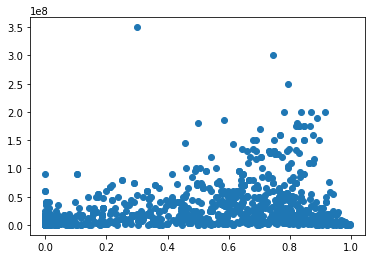

In [57]:
plt.scatter(merged.worldwide_gross_percentage_contribution, merged.production_budget)

In [58]:
merged['num_of_genres'] = merged.genres.apply(lambda x: len(x))

<BarContainer object of 1225 artists>

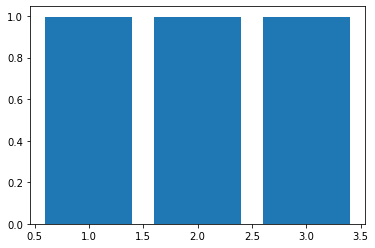

In [59]:
plt.bar(merged.num_of_genres, merged.worldwide_gross_percentage_contribution)

In [60]:
merged.groupby(['num_of_genres'])[['budget_percentage_contribution','worldwide_gross_percentage_contribution']].mean()

,budget_percentage_contribution,worldwide_gross_percentage_contribution
num_of_genres,,
1,0.550289,0.449711
2,0.556595,0.443405
3,0.503627,0.496373


In [61]:
merged.groupby(['num_of_genres'])[genre_columns].mean()

,News,Animation,Western,Sci-Fi,Action,Documentary,History,Thriller,Comedy,Horror,...,Romance,Music,Drama,Adventure,Fantasy,Crime,War,Family,Biography,Mystery
num_of_genres,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.010081,0.004032,0.014113,0.042339,0.197581,0.002016,0.066532,0.082661,0.104839,...,0.008065,0.002016,0.409274,0.014113,0.004032,0.004032,0.002016,0.016129,0.006048,0.004032
2,0.010830,0.021661,0.010830,0.043321,0.097473,0.101083,0.021661,0.245487,0.274368,0.104693,...,0.137184,0.025271,0.548736,0.028881,0.039711,0.104693,0.010830,0.061372,0.039711,0.021661
3,0.004425,0.037611,0.004425,0.139381,0.356195,0.073009,0.044248,0.254425,0.274336,0.170354,...,0.117257,0.037611,0.555310,0.201327,0.075221,0.221239,0.015487,0.066372,0.134956,0.157080


In [62]:
def rating_scale(rating):
    if rating >=7:
        return 'Great'
    elif rating < 7 and rating >= 5:
        return 'Okay'
    else:
        return 'Garbage'

In [63]:
merged['rating'] = merged.averagerating.apply(lambda x: rating_scale(x))

<AxesSubplot:ylabel='rating'>

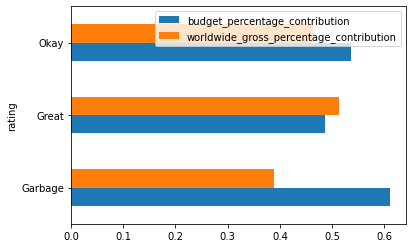

In [64]:
merged.groupby(['rating'])[['budget_percentage_contribution','worldwide_gross_percentage_contribution']].mean().plot(kind='barh')

(array([220.,  24.,  10.,  16.,   7.,  10.,  10.,   3.,   4.,   6.,   4.,
          6.,   2.,   9.,   3.,   6.,   4.,   7.,  17.,   6.,   3.,  16.,
          4.,   4.,   1.,   6.,   7.,   5.,  17.,   3.,   7.,   6.,   3.,
         10.,   8.,  10.,   3.,  10.,   2.,   6.,   3.,   7.,   1.,   8.,
          8.,  13.,  10.,   5.,   6.,   7.,  14.,   8.,   6.,   6.,  18.,
          2.,   9.,  13.,  19.,  17.,  10.,  12.,  13.,  18.,  13.,  19.,
         15.,   6.,  15.,  15.,  18.,  18.,   7.,  11.,  13.,  12.,  20.,
         16.,  19.,  17.,  24.,  17.,  16.,  18.,  22.,  10.,   9.,   9.,
         12.,  18.,   8.,  16.,  18.,  11.,   8.,   9.,   7.,   8.,   6.,
          7.]),
 array([0.        , 0.00996809, 0.01993617, 0.02990426, 0.03987235,
        0.04984044, 0.05980852, 0.06977661, 0.0797447 , 0.08971279,
        0.09968087, 0.10964896, 0.11961705, 0.12958513, 0.13955322,
        0.14952131, 0.1594894 , 0.16945748, 0.17942557, 0.18939366,
        0.19936174, 0.20932983, 0.21929792, 0.

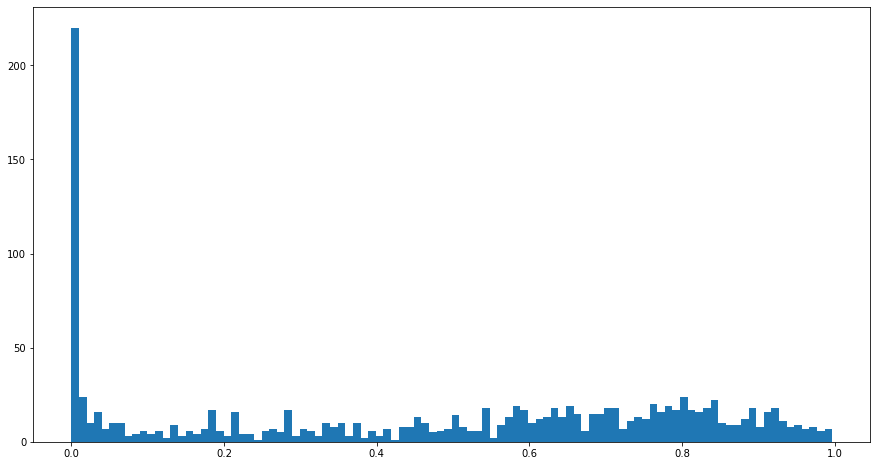

In [65]:
okay = merged[merged.rating == 'Okay']
fig, ax= plt.subplots(figsize=(15,8))
ax.hist(merged.worldwide_gross_percentage_contribution, bins=100)

Analysis of Genres

-Does number of genres of a movie affect its gross contribution?
-Does the type of genre of a movie affect its gross contribution?
-Does the type of genre affect a movie's rating?

In [66]:
merged.head()

,movie_id,start_year,runtime_minutes,genres,averagerating,numvotes,title,id,release_date,production_budget,...,Family,Musical,Adventure,Documentary,budget_percentage_contribution,worldwide_gross_percentage_contribution,domestic_gross_percentage_contribution,production_budget_contribution_domestic,num_of_genres,rating
0,tt0339736,2017,98.0,[Horror],5.6,2420,Whiplash,43,"Oct 10, 2014",3300000.0,...,0,0,0,0,0.078071,0.921929,0.798682,0.201318,1,Okay
1,tt0393049,2010,98.0,"[Comedy, Drama, Romance]",5.5,106,Anderson's Cross,65,"Dec 31, 2010",300000.0,...,0,0,0,0,1.000000,0.000000,0.000000,1.000000,3,Okay
2,tt0426566,2012,NaN,[Drama],6.0,13,Breakdown,11,"May 2, 1997",36000000.0,...,0,0,0,0,0.417831,0.582169,0.582169,0.417831,1,Okay
3,tt0436230,2010,NaN,"[Horror, Thriller]",6.7,34,The Devil Inside,12,"Jan 6, 2012",1000000.0,...,0,0,0,0,0.009731,0.990269,0.981571,0.018429,2,Okay
4,tt0437086,2019,122.0,"[Action, Adventure, Sci-Fi]",7.5,88207,Alita: Battle Angel,24,"Feb 14, 2019",170000000.0,...,0,0,1,0,0.296697,0.703303,0.335185,0.664815,3,Great


In [67]:
main_df = merged[merged.worldwide_gross != 0]

In [68]:
num_genres_by_contribution = main_df.groupby(['num_of_genres']).mean()

In [69]:
num_genres_by_contribution

,start_year,runtime_minutes,averagerating,numvotes,id,production_budget,domestic_gross,worldwide_gross,Comedy,Horror,...,War,Fantasy,Family,Musical,Adventure,Documentary,budget_percentage_contribution,worldwide_gross_percentage_contribution,domestic_gross_percentage_contribution,production_budget_contribution_domestic
num_of_genres,,,,,,,,,,,,,,,,,,,,,
1,2014.107728,91.750000,6.286651,2824.906323,49.332553,2.661601e+07,3.451932e+07,7.615109e+07,0.077283,0.091335,...,0.002342,0.004684,0.011710,0.004684,0.014052,0.203747,0.477619,0.522381,0.397665,0.602335
2,2013.628319,100.392344,6.134956,23118.632743,52.756637,2.520263e+07,3.152187e+07,7.073085e+07,0.247788,0.079646,...,0.013274,0.039823,0.057522,0.017699,0.035398,0.106195,0.456534,0.543466,0.418356,0.581644
3,2013.984962,104.073791,6.276441,69963.847118,52.952381,3.739617e+07,4.854660e+07,1.166111e+08,0.288221,0.150376,...,0.017544,0.075188,0.070175,0.015038,0.205514,0.072682,0.437693,0.562307,0.432616,0.567384


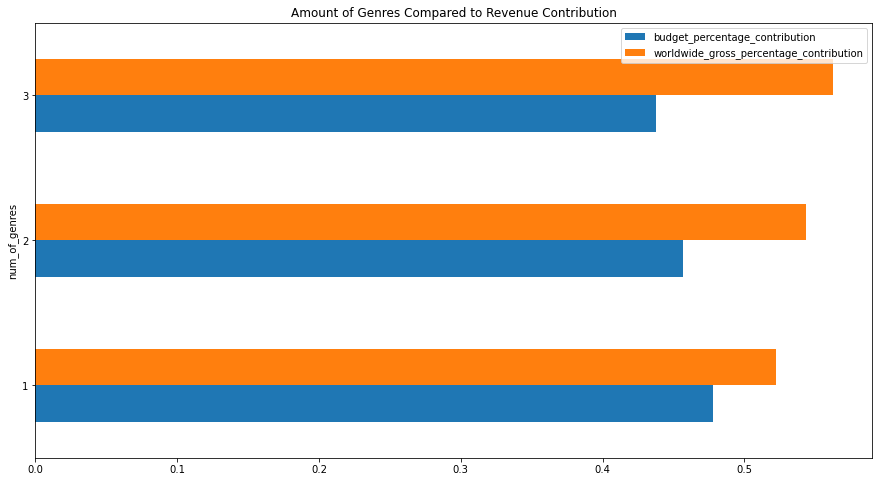

In [70]:
num_genres_by_contribution[['budget_percentage_contribution', 'worldwide_gross_percentage_contribution']].plot(kind='barh', figsize=(15,8), title='Amount of Genres Compared to Revenue Contribution')
plt.show()

In [71]:
groups = []

for i in genre_columns:
    i = main_df.groupby([i]).mean()
    groups.append(i)

len(groups)

22

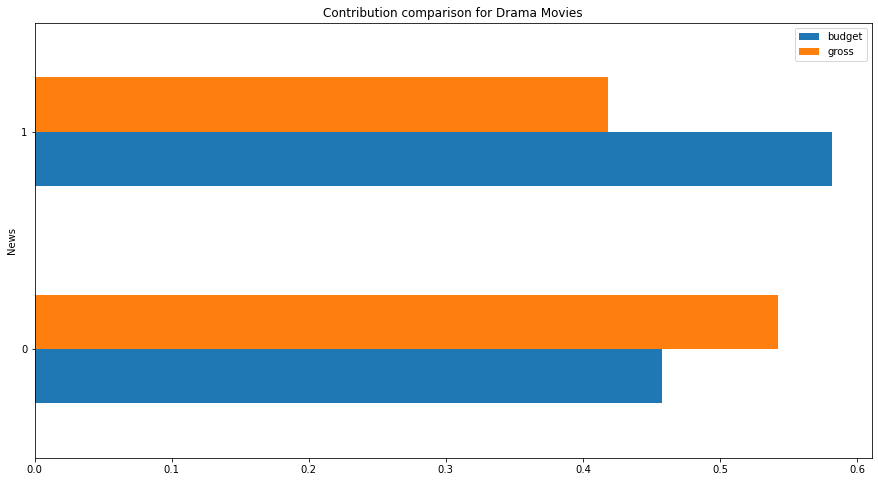

In [72]:
groups[0][['budget_percentage_contribution', 'worldwide_gross_percentage_contribution']].plot(kind='barh', figsize=(15,8))
plt.legend(['budget', 'gross'])
plt.title('Contribution comparison for Drama Movies')
                                                                
plt.show()

In [73]:
list(groups[0][['budget_percentage_contribution', 'worldwide_gross_percentage_contribution']].loc[1])[1]

0.4185179938232181

In [74]:
groups[0][['budget_percentage_contribution', 'worldwide_gross_percentage_contribution']].loc[0:1]

,budget_percentage_contribution,worldwide_gross_percentage_contribution
News,,
0,0.457357,0.542643
1,0.581482,0.418518


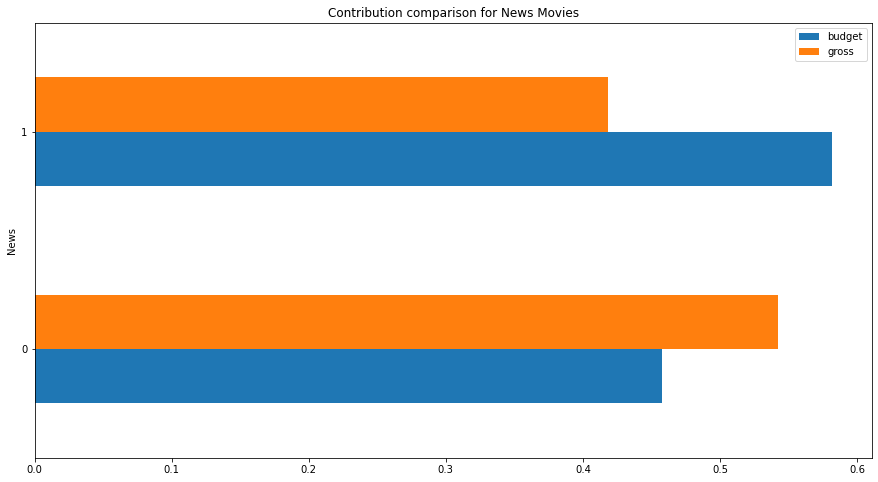

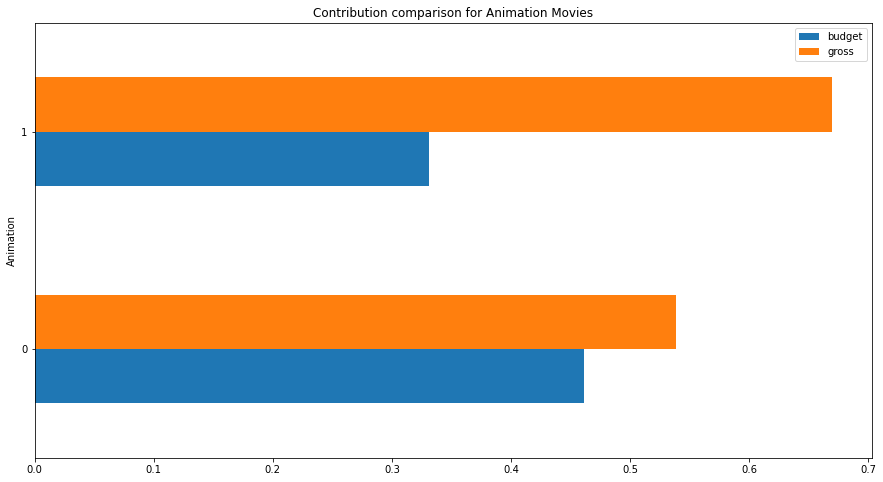

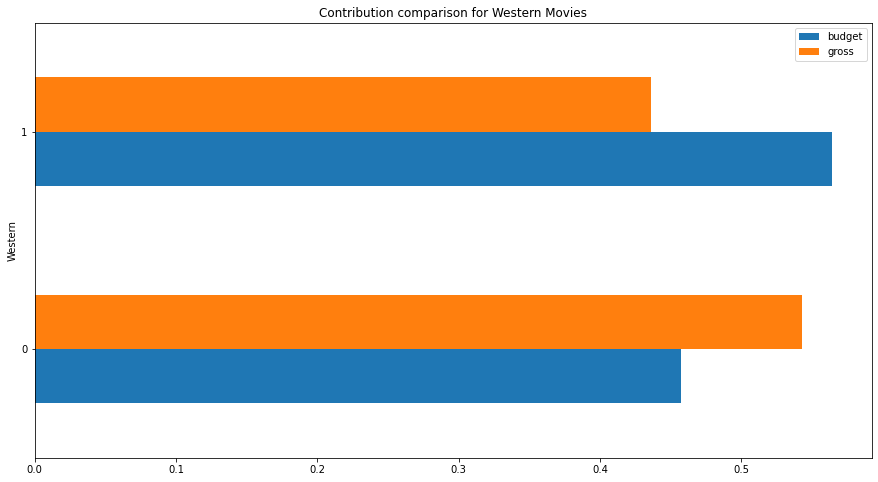

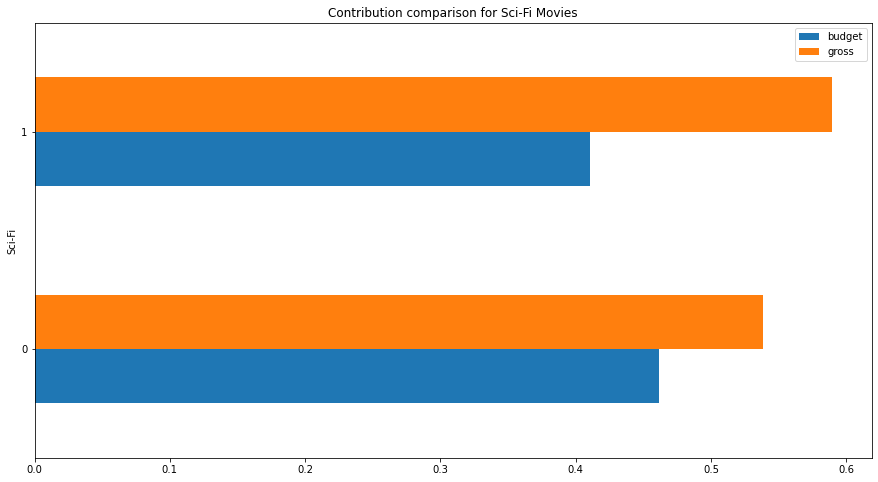

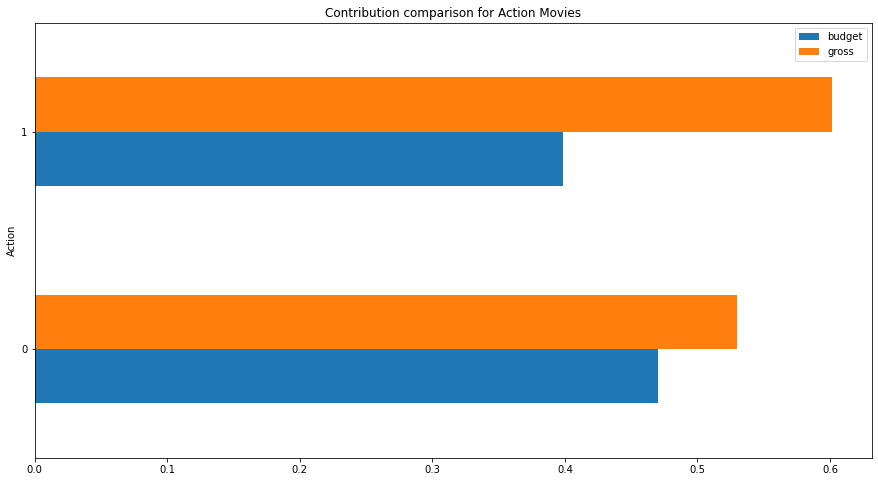

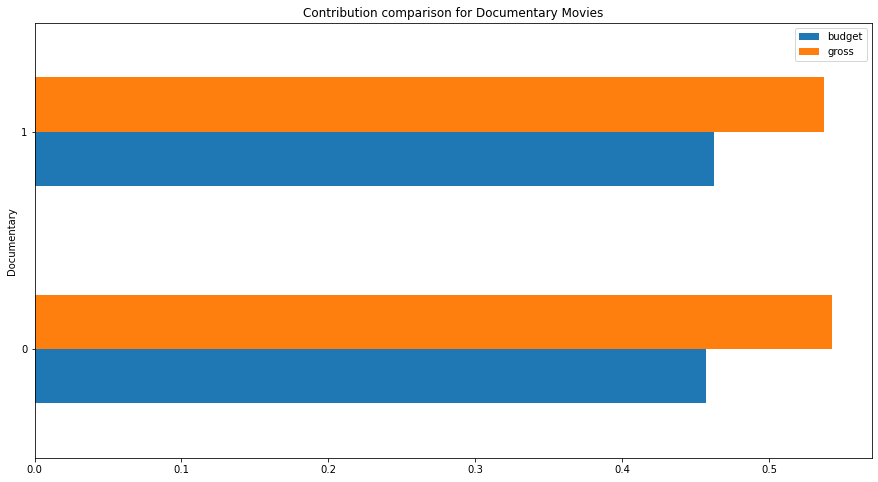

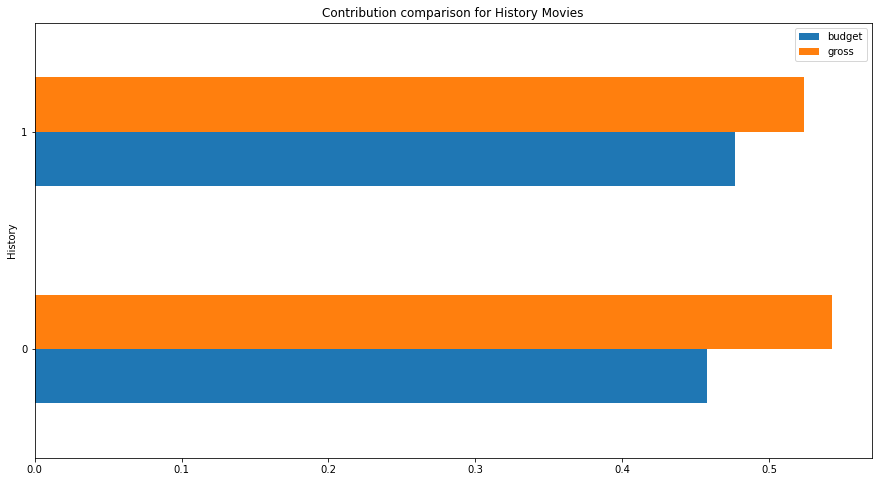

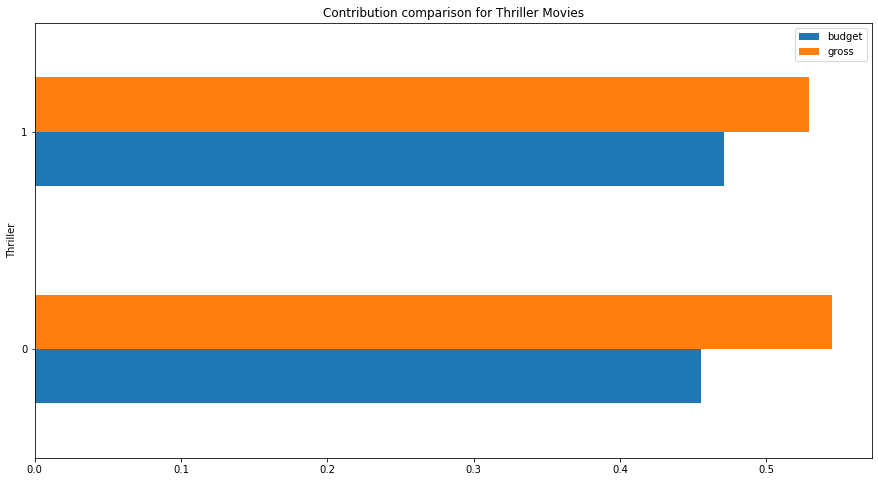

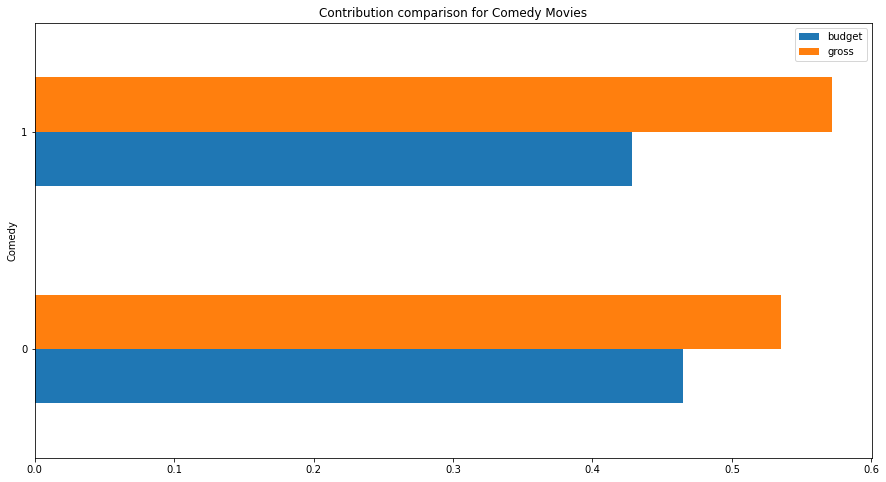

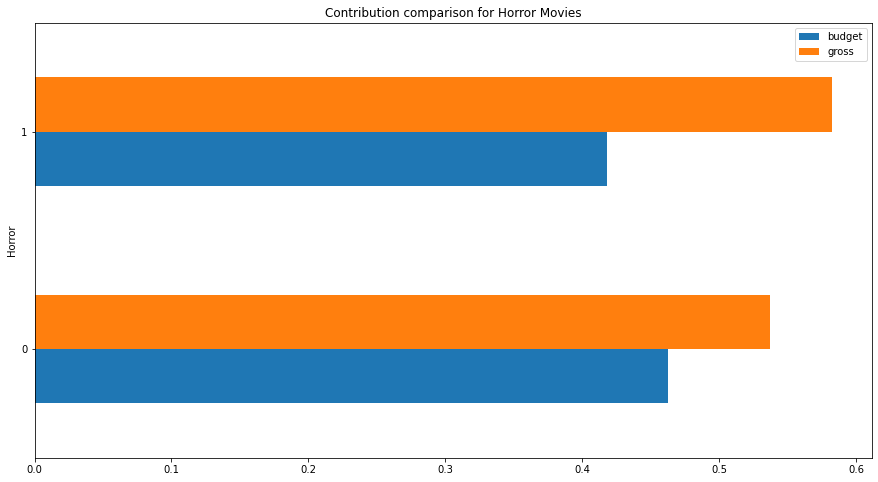

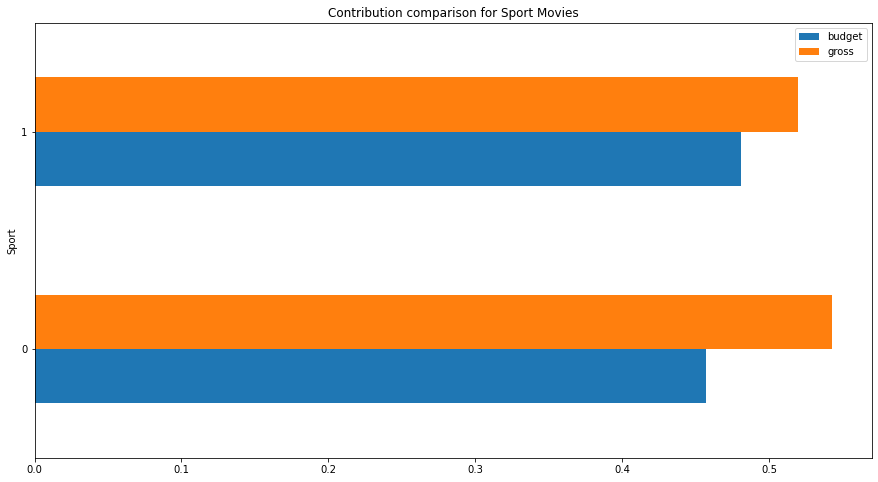

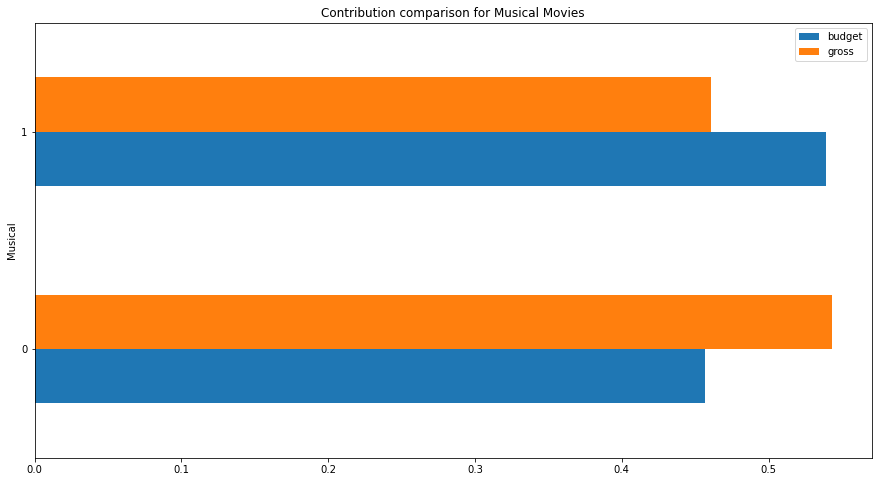

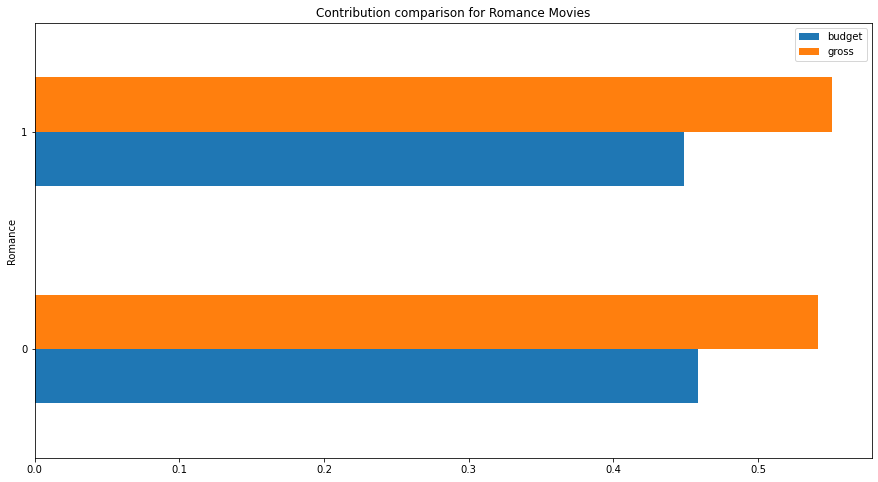

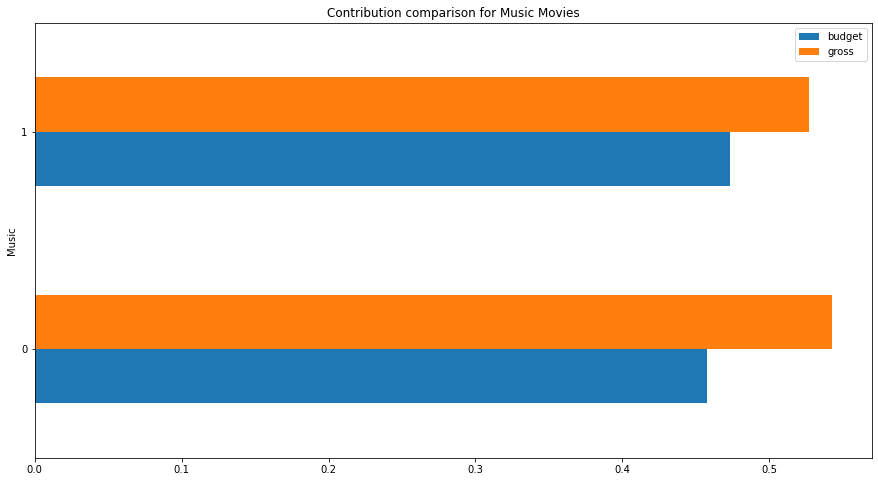

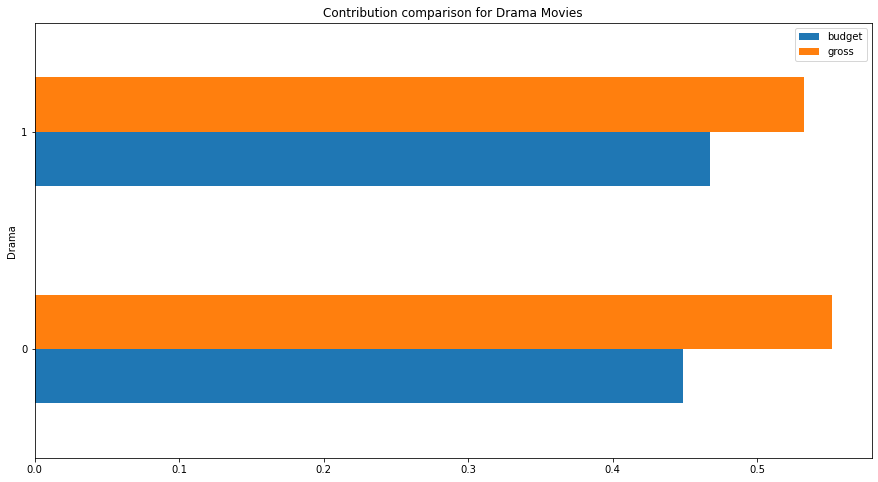

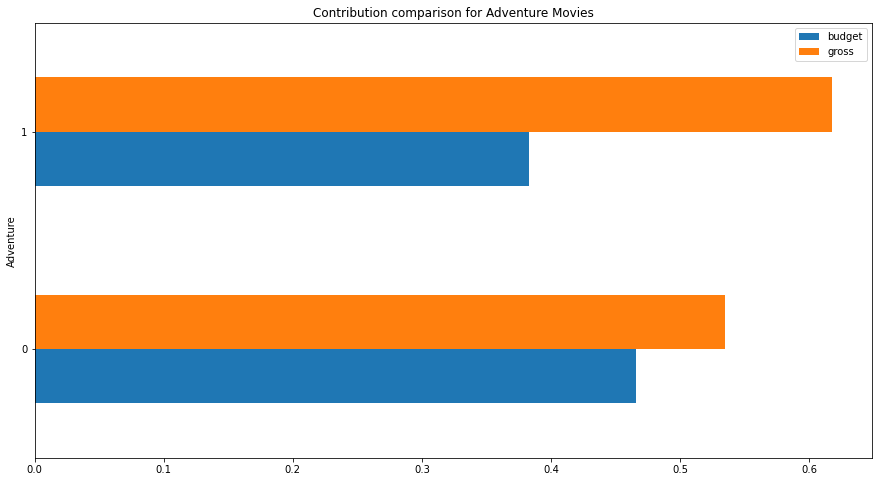

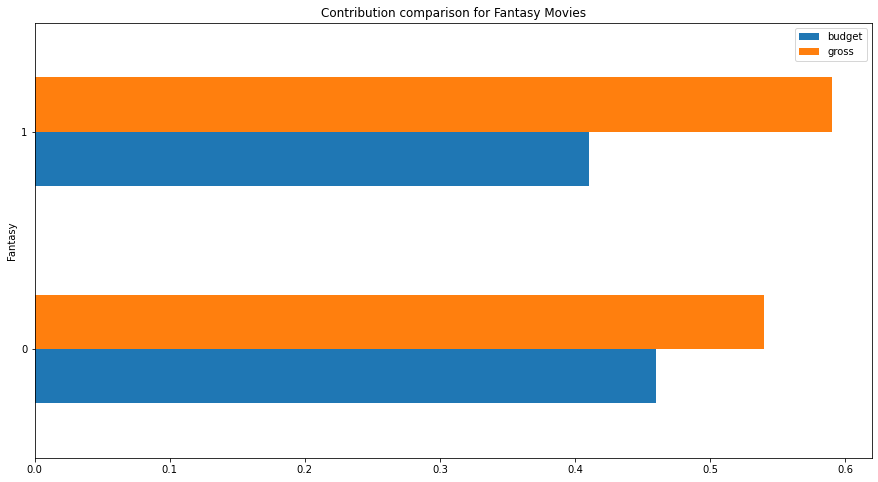

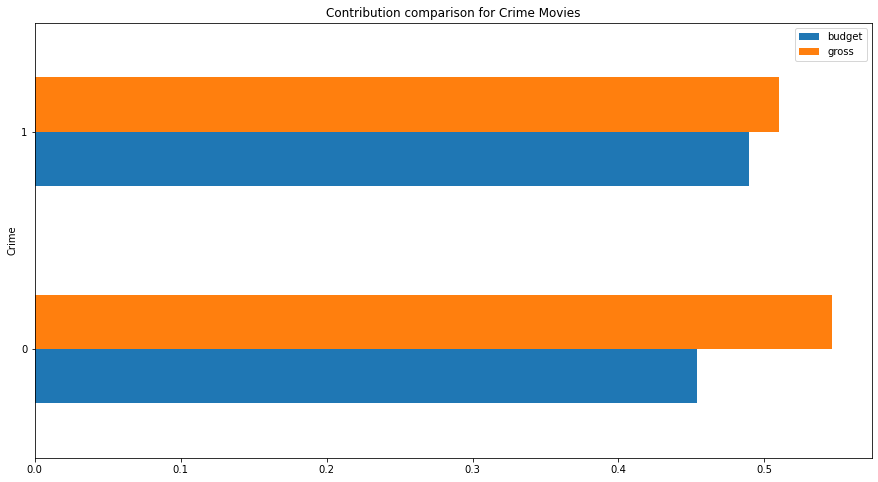

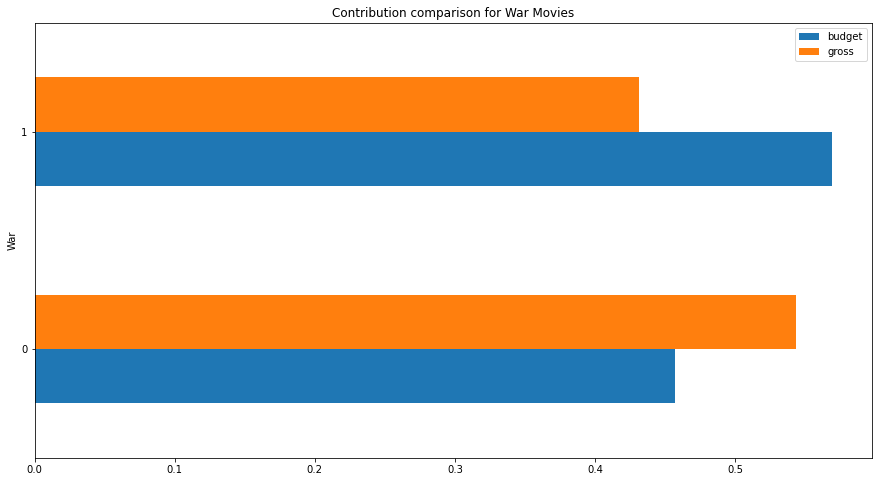

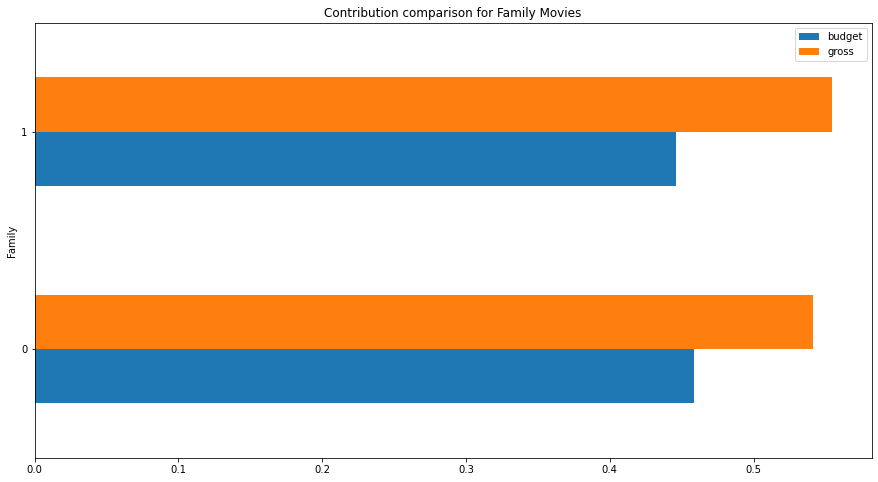

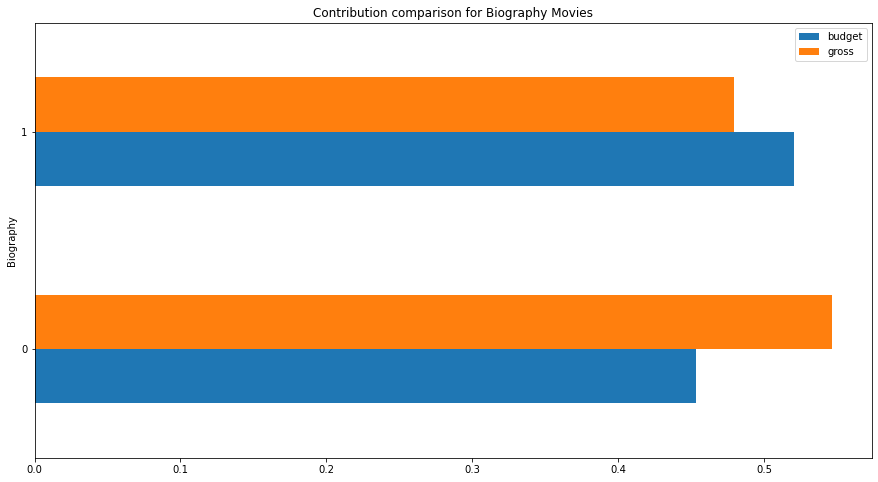

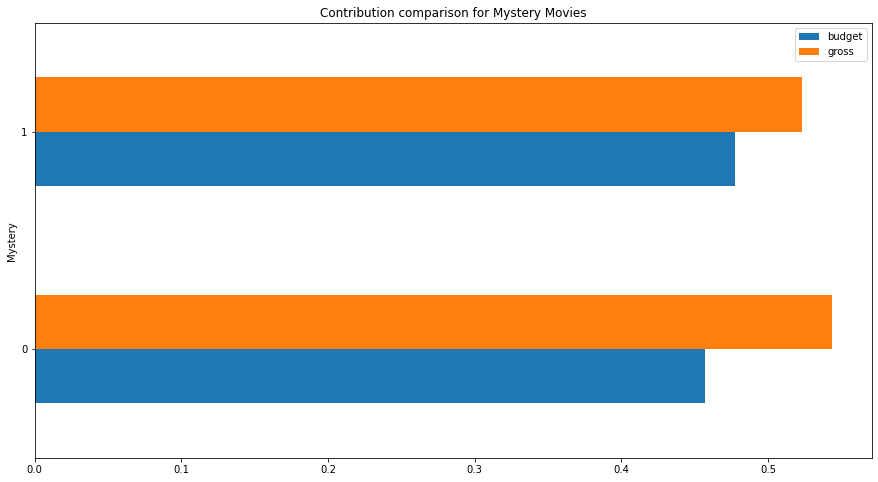

In [75]:
dct = {}

counter = 0
for i in genre_columns:
    

    groups[counter][['budget_percentage_contribution', 'worldwide_gross_percentage_contribution']].plot(kind='barh', figsize=(15,8))
    plt.legend(['budget', 'gross'])
    plt.title('Contribution comparison for {} Movies'.format(i))
    
    dct[i] = list(groups[counter][['budget_percentage_contribution', 'worldwide_gross_percentage_contribution']].loc[1])[1]
                                                                
    plt.show()
    counter +=1

In [76]:
gross_contributions = pd.DataFrame(data=dct, index=range(1))

In [77]:
gross_contributions = gross_contributions.transpose()

In [78]:
gross_contributions.columns.name = None

In [79]:
list(gross_contributions.values)

[array([0.41851799]),
 array([0.66914099]),
 array([0.43614269]),
 array([0.58924808]),
 array([0.60124159]),
 array([0.53765299]),
 array([0.52355685]),
 array([0.52921719]),
 array([0.57154179]),
 array([0.58222934]),
 array([0.51941701]),
 array([0.46073352]),
 array([0.55094956]),
 array([0.52683182]),
 array([0.53268314]),
 array([0.61726203]),
 array([0.58988298]),
 array([0.51027343]),
 array([0.43105071]),
 array([0.5542527]),
 array([0.47962517]),
 array([0.52289595])]

<AxesSubplot:>

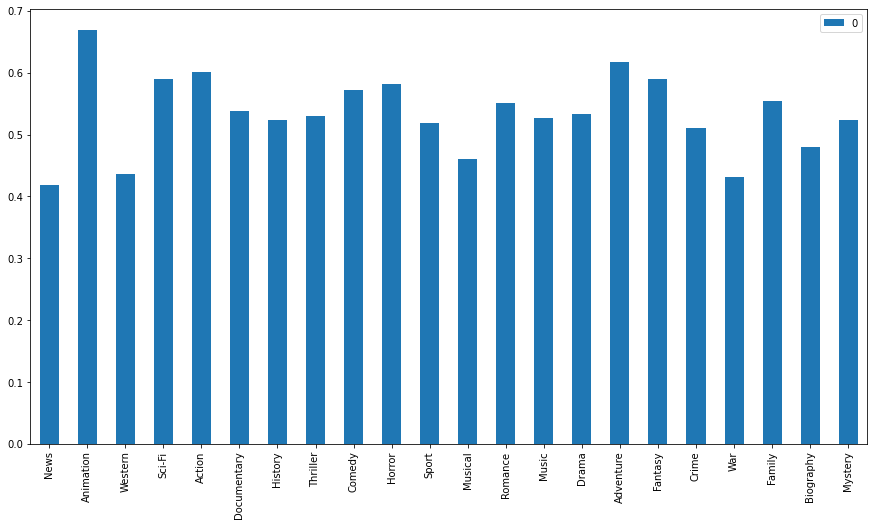

In [80]:
gross_contributions.plot(kind='bar', figsize=(15,8))

In [81]:
wanted_columns=['movie_id', 'averagerating', 'numvotes', 'num_of_genres', 'rating','budget_percentage_contribution', 'worldwide_gross_percentage_contribution', 'domestic_gross_percentage_contribution', 'production_budget_contribution_domestic']
for i in genre_columns:
    wanted_columns.append(i)

In [82]:
wanted_columns

['movie_id',
 'averagerating',
 'numvotes',
 'num_of_genres',
 'rating',
 'budget_percentage_contribution',
 'worldwide_gross_percentage_contribution',
 'domestic_gross_percentage_contribution',
 'production_budget_contribution_domestic',
 'News',
 'Animation',
 'Western',
 'Sci-Fi',
 'Action',
 'Documentary',
 'History',
 'Thriller',
 'Comedy',
 'Horror',
 'Sport',
 'Musical',
 'Romance',
 'Music',
 'Drama',
 'Adventure',
 'Fantasy',
 'Crime',
 'War',
 'Family',
 'Biography',
 'Mystery']

In [83]:
filtered_df = main_df.loc[:, wanted_columns]

In [84]:
directors= pd.read_sql("""

SELECT *
FROM directors
""", conn)

In [85]:
directors

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


In [86]:
directors= pd.read_sql("""

SELECT primary_name as director, movie_id
FROM persons
JOIN directors
    USING(person_id)
""", conn)

In [87]:
directors.value_counts()

director              movie_id 
Dawn Cobalt           tt2249786    52
Stare Yildirim        tt2249786    52
Rick Skyler           tt2249786    52
James Cookson         tt2249786    52
Maureen Hascoet       tt2249786    52
                                   ..
Marko Terva-Aho       tt2943058     1
Marko Vrdoljak        tt3139374     1
Marko Vuorinen        tt3363840     1
                      tt6348664     1
'Atlas' Ramachandran  tt3433162     1
Length: 163295, dtype: int64

In [88]:
df_5 = filtered_df.merge(directors, on='movie_id')

In [89]:
df_5

,movie_id,averagerating,numvotes,num_of_genres,rating,budget_percentage_contribution,worldwide_gross_percentage_contribution,domestic_gross_percentage_contribution,production_budget_contribution_domestic,News,...,Music,Drama,Adventure,Fantasy,Crime,War,Family,Biography,Mystery,director
0,tt0339736,5.6,2420,1,Okay,0.078071,0.921929,0.798682,0.201318,0,...,0,0,0,0,0,0,0,0,0,Andrew Getty
1,tt0426566,6.0,13,1,Okay,0.417831,0.582169,0.582169,0.417831,0,...,0,1,0,0,0,0,0,0,0,Julio Bove
2,tt0426566,6.0,13,1,Okay,0.417831,0.582169,0.582169,0.417831,0,...,0,1,0,0,0,0,0,0,0,Julio Bove
3,tt0436230,6.7,34,2,Okay,0.009731,0.990269,0.981571,0.018429,0,...,0,0,0,0,0,0,0,0,0,Joaquin Perea
4,tt0436230,6.7,34,2,Okay,0.009731,0.990269,0.981571,0.018429,0,...,0,0,0,0,0,0,0,0,0,Joaquin Perea
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2383,tt8816388,5.7,7,1,Okay,0.391231,0.608769,0.000000,1.000000,0,...,0,0,0,0,0,0,0,0,0,Pia Borg
2384,tt9024106,6.3,5945,2,Okay,0.248884,0.751116,0.751116,0.248884,0,...,0,1,0,0,0,0,0,1,0,Chuck Konzelman
2385,tt9024106,6.3,5945,2,Okay,0.248884,0.751116,0.751116,0.248884,0,...,0,1,0,0,0,0,0,1,0,Chuck Konzelman
2386,tt9024106,6.3,5945,2,Okay,0.248884,0.751116,0.751116,0.248884,0,...,0,1,0,0,0,0,0,1,0,Cary Solomon


In [90]:
grouped_director = df_5.groupby(['director']).mean()

In [91]:
unstack_director = grouped_director[['budget_percentage_contribution', 'worldwide_gross_percentage_contribution']].unstack().unstack()

In [92]:
columns_list = list(unstack_director.columns)
unstack_director['Andrew Getty']

budget_percentage_contribution             0.078071
worldwide_gross_percentage_contribution    0.921929
Name: Andrew Getty, dtype: float64

In [93]:
grouped_director = df_5.groupby(['director'])['worldwide_gross_percentage_contribution'].mean()

In [94]:
unstack_director

director,Aaron Alon,Aaron Boltz,Aash Aaron,Aashiq Abu,Abby Kohn,Abhijit Guha,Adam McKay,Adam Montierth,Adam Shankman,Adam Shaw,...,Yossi Madmoni,Youssef Delara,Zach Braff,Zal Batmanglij,Zanbo Zhang,Zehao Gao,Zhi-yu Ma,Zoran Lisinac,Zuri Rinpoche,Ömür Atay
budget_percentage_contribution,0.603132,0.742631,0.217391,0.710048,0.258996,0.254744,0.458424,0.988481,0.22244,0.032508,...,0.628527,0.2983,0.233753,0.682203,0.461197,0.154774,0.035487,0.987229,0.346087,0.393637
worldwide_gross_percentage_contribution,0.396868,0.257369,0.782609,0.289952,0.741004,0.745256,0.541576,0.011519,0.77756,0.967492,...,0.371473,0.7017,0.766247,0.317797,0.538803,0.845226,0.964513,0.012771,0.653913,0.606363


In [95]:
unstack_director['Aaron Alon']

budget_percentage_contribution             0.603132
worldwide_gross_percentage_contribution    0.396868
Name: Aaron Alon, dtype: float64

In [96]:
dct_2 = {}
lst = list(unstack_director.columns)
for i in lst:
    dct_2[i] = unstack_director[i][1]
    

In [97]:
dct_2

{'Aaron Alon': 0.39686784857591884,
 'Aaron Boltz': 0.2573690572235201,
 'Aash Aaron': 0.782608695652174,
 'Aashiq Abu': 0.28995218916734017,
 'Abby Kohn': 0.7410035079698927,
 'Abhijit Guha': 0.74525611214103,
 'Adam McKay': 0.5415758990130213,
 'Adam Montierth': 0.011519097451037245,
 'Adam Shankman': 0.7775600411883173,
 'Adam Shaw': 0.9674916230788931,
 'Adam Starks': 0.4301921655553871,
 'Adam Vermillion': 0.19220814749632995,
 'Adam Wingard': 0.9641412251946477,
 'Aditya Om': 0.533257413015565,
 'Adolfo Cantu-Villarreal': 0.643558448194831,
 'Ahmad Bargouthi': 0.790540428734418,
 'Ahsan Rahim': 0.06179986815160813,
 'Aisha Bulahova': 0.8379875303538462,
 'Aishwarya Dhanush': 0.039422628961514466,
 'Al Ghanekar': 0.15769306900818764,
 'Alain Desrochers': 0.09322889402812208,
 'Alastair Siddons': 0.8299709674358142,
 'Albert Maysles': 0.5036315668302788,
 'Albert Serra': 0.05677296531780213,
 'Albin Joseph': 0.966183574879227,
 'Alec Ziff': 0.7210616900039792,
 'Alejandro Fernández

In [98]:
df_10 = pd.DataFrame(data=dct_2, index=range(1))

In [99]:
df_10= df_10.transpose()

In [100]:
df_10

,0
Aaron Alon,0.396868
Aaron Boltz,0.257369
Aash Aaron,0.782609
Aashiq Abu,0.289952
Abby Kohn,0.741004
...,...
Zehao Gao,0.845226
Zhi-yu Ma,0.964513
Zoran Lisinac,0.012771
Zuri Rinpoche,0.653913


<AxesSubplot:>

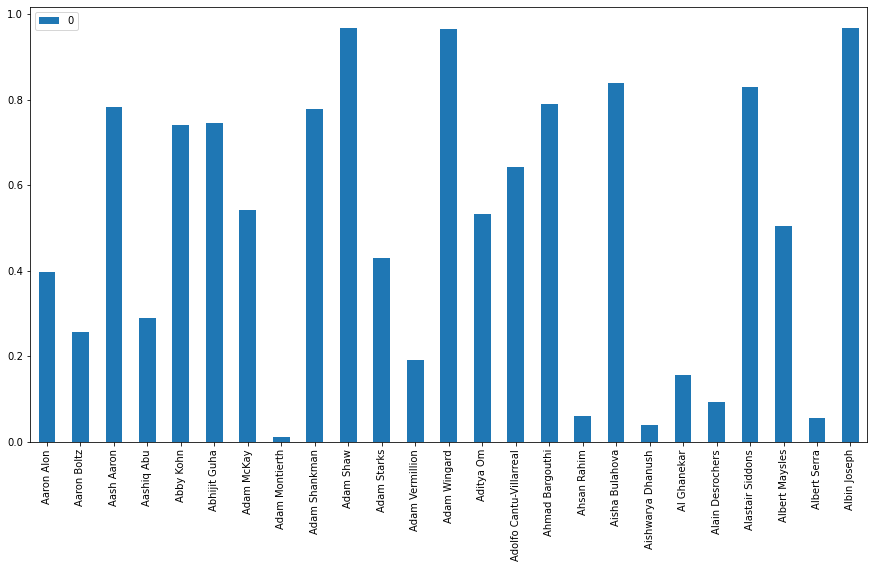

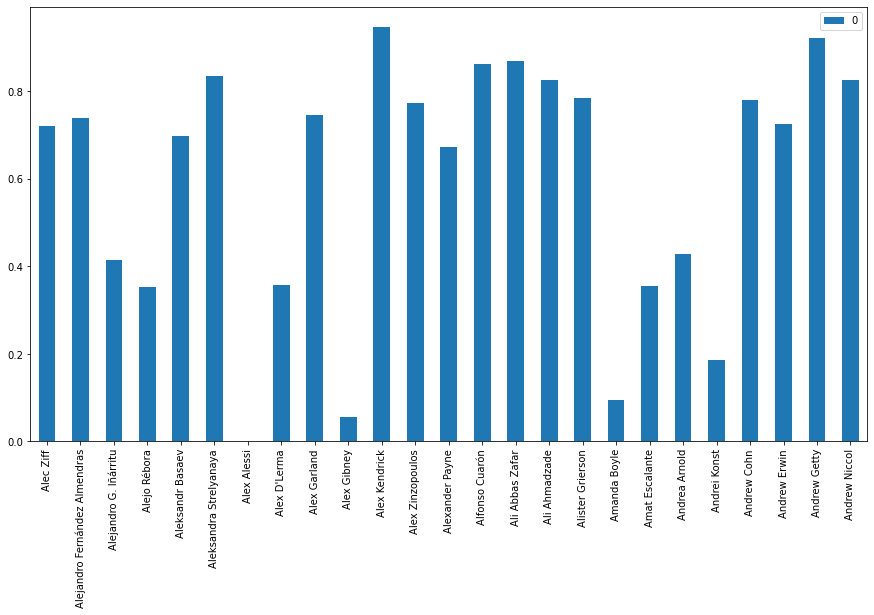

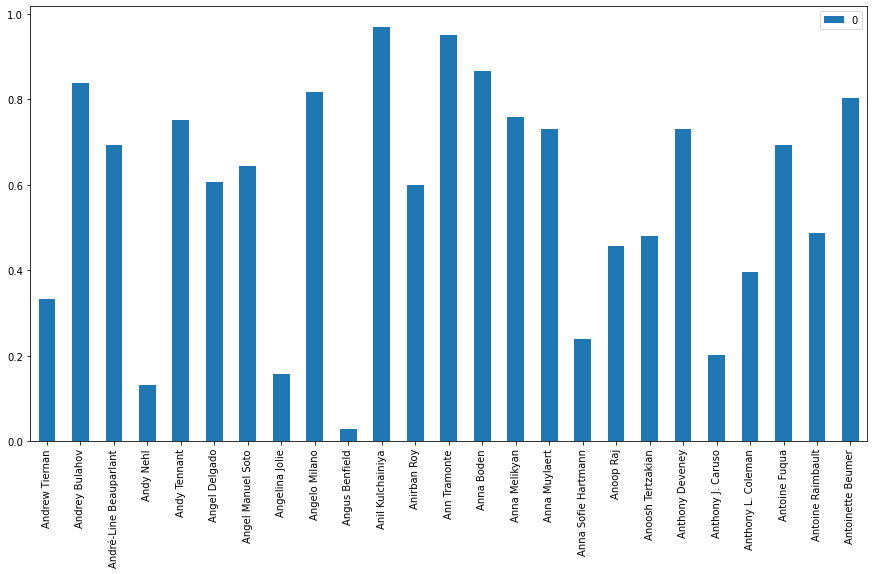

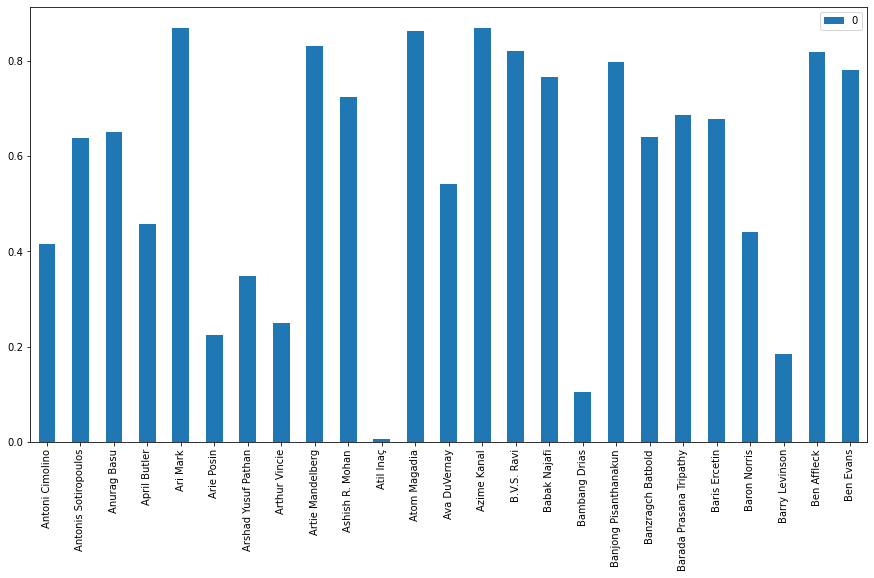

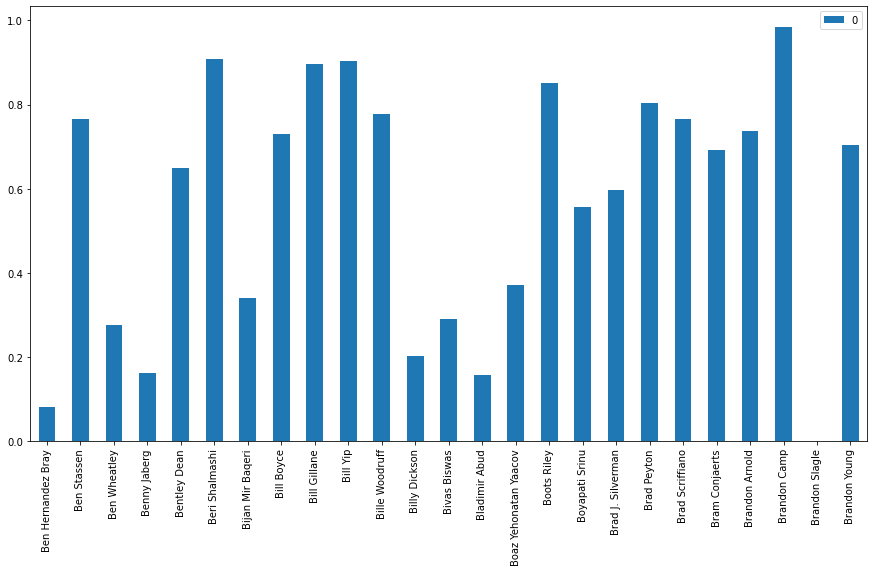

In [101]:
df_10.iloc[:25].plot(kind='bar', figsize=(15,8))
df_10.iloc[25:50].plot(kind='bar', figsize=(15,8))
df_10.iloc[50:75].plot(kind='bar', figsize=(15,8))
df_10.iloc[75:100].plot(kind='bar', figsize=(15,8))
df_10.iloc[100:125].plot(kind='bar', figsize=(15,8))

In [102]:
df_5

,movie_id,averagerating,numvotes,num_of_genres,rating,budget_percentage_contribution,worldwide_gross_percentage_contribution,domestic_gross_percentage_contribution,production_budget_contribution_domestic,News,...,Music,Drama,Adventure,Fantasy,Crime,War,Family,Biography,Mystery,director
0,tt0339736,5.6,2420,1,Okay,0.078071,0.921929,0.798682,0.201318,0,...,0,0,0,0,0,0,0,0,0,Andrew Getty
1,tt0426566,6.0,13,1,Okay,0.417831,0.582169,0.582169,0.417831,0,...,0,1,0,0,0,0,0,0,0,Julio Bove
2,tt0426566,6.0,13,1,Okay,0.417831,0.582169,0.582169,0.417831,0,...,0,1,0,0,0,0,0,0,0,Julio Bove
3,tt0436230,6.7,34,2,Okay,0.009731,0.990269,0.981571,0.018429,0,...,0,0,0,0,0,0,0,0,0,Joaquin Perea
4,tt0436230,6.7,34,2,Okay,0.009731,0.990269,0.981571,0.018429,0,...,0,0,0,0,0,0,0,0,0,Joaquin Perea
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2383,tt8816388,5.7,7,1,Okay,0.391231,0.608769,0.000000,1.000000,0,...,0,0,0,0,0,0,0,0,0,Pia Borg
2384,tt9024106,6.3,5945,2,Okay,0.248884,0.751116,0.751116,0.248884,0,...,0,1,0,0,0,0,0,1,0,Chuck Konzelman
2385,tt9024106,6.3,5945,2,Okay,0.248884,0.751116,0.751116,0.248884,0,...,0,1,0,0,0,0,0,1,0,Chuck Konzelman
2386,tt9024106,6.3,5945,2,Okay,0.248884,0.751116,0.751116,0.248884,0,...,0,1,0,0,0,0,0,1,0,Cary Solomon


In [143]:
new_data = df_5[(df_5.worldwide_gross_percentage_contribution > 0.5) & (df_5.numvotes > 50000) & (df_5.Drama == 1)]

In [144]:
director_gross = new_data.groupby(['director'])[['worldwide_gross_percentage_contribution']].mean()

(0.8, 1.002951842090305)

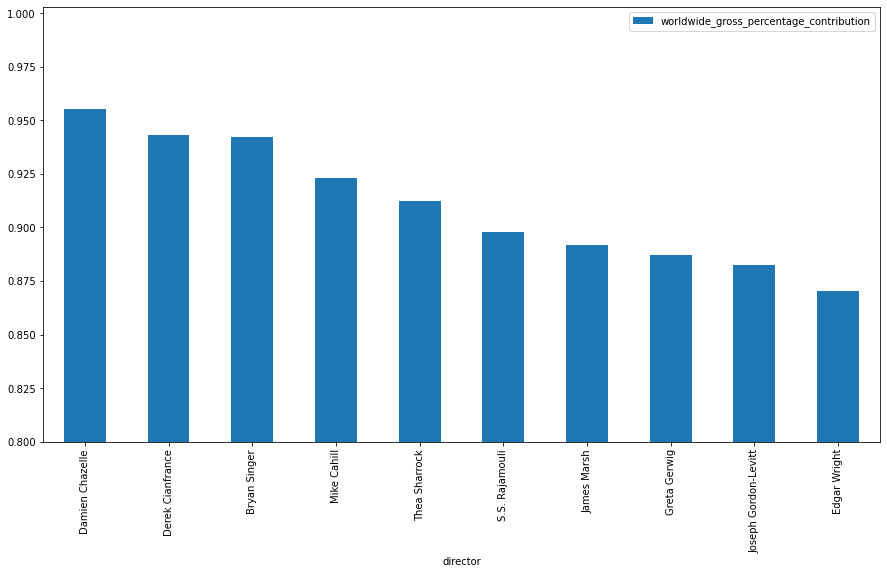

In [148]:
director_gross.sort_values(by='worldwide_gross_percentage_contribution', ascending=False).iloc[0:10].plot(kind = 'bar', figsize=(15,8))
plt.ylim(0.8)

In [149]:
new_data_1 = df_5[(df_5.worldwide_gross_percentage_contribution > 0.5) & (df_5.numvotes > 50000) & (df_5.Comedy == 1)]

In [150]:
x = new_data_1.groupby(['director'])[['worldwide_gross_percentage_contribution']].mean()

(0.8, 1.01234828645438)

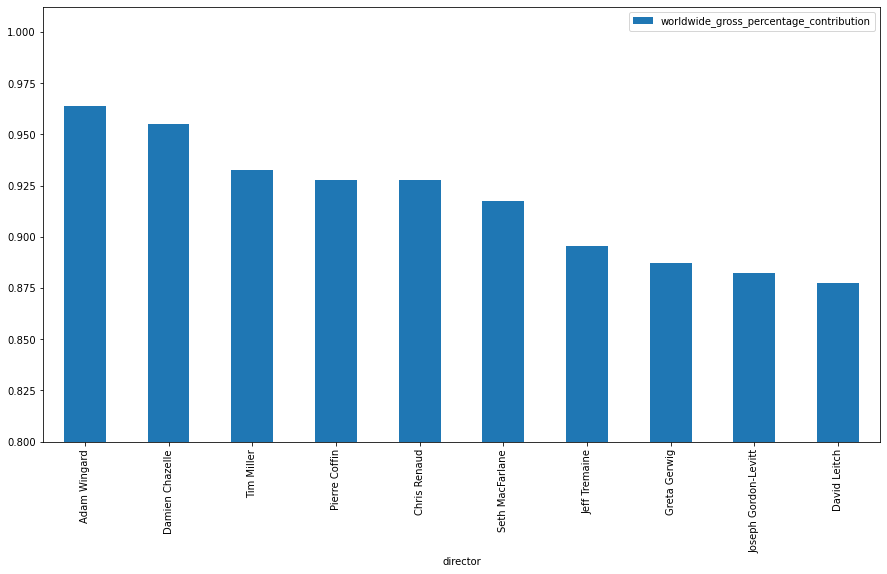

In [153]:
x.sort_values(by='worldwide_gross_percentage_contribution', ascending=False).iloc[0:10].plot(kind = 'bar', figsize=(15,8))
plt.ylim(0.8)